# 7. Econometrics

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.api import add_constant, OLS
from statsmodels.iolib.summary2 import summary_col
from numpy import NaN
from sklearn import linear_model
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from linearmodels.iv import IV2SLS

In [2]:
covidvisual = pd.read_excel('covidvisualApril5th2023.xlsx')

In [3]:
covidvisual

Country Country Code  Latitude  Longitude  HDI rank  \
0       Albania          ALB      41.0       20.0        67   
1       Algeria          DZA      28.0        3.0        91   
2        Angola          AGO     -12.5       18.5       148   
3       Armenia          ARM      40.0       45.0        85   
4     Australia          AUS     -27.0      133.0         5   
..          ...          ...       ...        ...       ...   
144  Uzbekistan          UZB      41.0       64.0       101   
145     Vanuatu          VUT     -16.0      167.0       140   
146    Viet Nam          VNM      16.0      106.0       115   
147      Zambia          ZMB     -15.0       30.0       154   
148    Zimbabwe          ZWE     -20.0       30.0       146   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                                 0.796                   76.4626   
1                                 0.745                   76.3767   
2                                 0.586                   61.6434   
3                                 0.759                   72.0431   
4                                 0.951                   84.5265   
..                                  ...                       ...   
144                               0.727                   70.8616   
145                               0.607                   70.4490   
146                               0.703                   73.6181   
147                               0.565                   61.2234   
148                               0.593                   59.2531   

     Expected years of schooling  Mean years of schooling  \
0                      14.448000                11.286455   
1                      14.626896                 8.069284   
2                      12.172100                 5.417391   
3                      13.116760                11.330300   
4                      21.054590                12.726820   
..                           ...                      ...   
144                    12.477140                11.895590   
145                    11.535315                 7.064846   
146                    12.951932                 8.370280   
147                    10.928760                 7.187091   
148                    12.110969                 8.710909   

     Gross national income (GNI) per capita  ...  NewRecovered  ActiveCases  \
0                              14131.110390  ...           NaN        1,709   
1                              10800.225460  ...           NaN       81,825   
2                               5465.617791  ...           NaN           41   
3                              13157.993900  ...           NaN        4,250   
4                              49238.433350  ...           NaN       43,652   
..                                      ...  ...           ...          ...   
144                             7916.785725  ...           NaN        8,716   
145                             3085.411633  ...           NaN           24   
146                             7867.371345  ...           +23      869,254   
147                             3217.767739  ...           NaN          122   
148                             3809.887158  ...           NaN          348   

     Serious,Critical  TotalTests  Population          Continent  \
0                 NaN   1,941,032     2866374             Europe   
1                 NaN     230,861    45350148             Africa   
2                 NaN   1,499,795    35027343             Africa   
3                 NaN   3,242,901     2971966               Asia   
4                  33  78,835,048    26068792  Australia/Oceania   
..                ...         ...         ...                ...   
144                23   1,377,915    34382084               Asia   
145               NaN      24,976      321832  Australia/Oceania   
146                 7  85,826,548    98953541               Asia   
147               NaN   3,994,061    19470234             Af

In [4]:
covidvisual.shape

(149, 43)

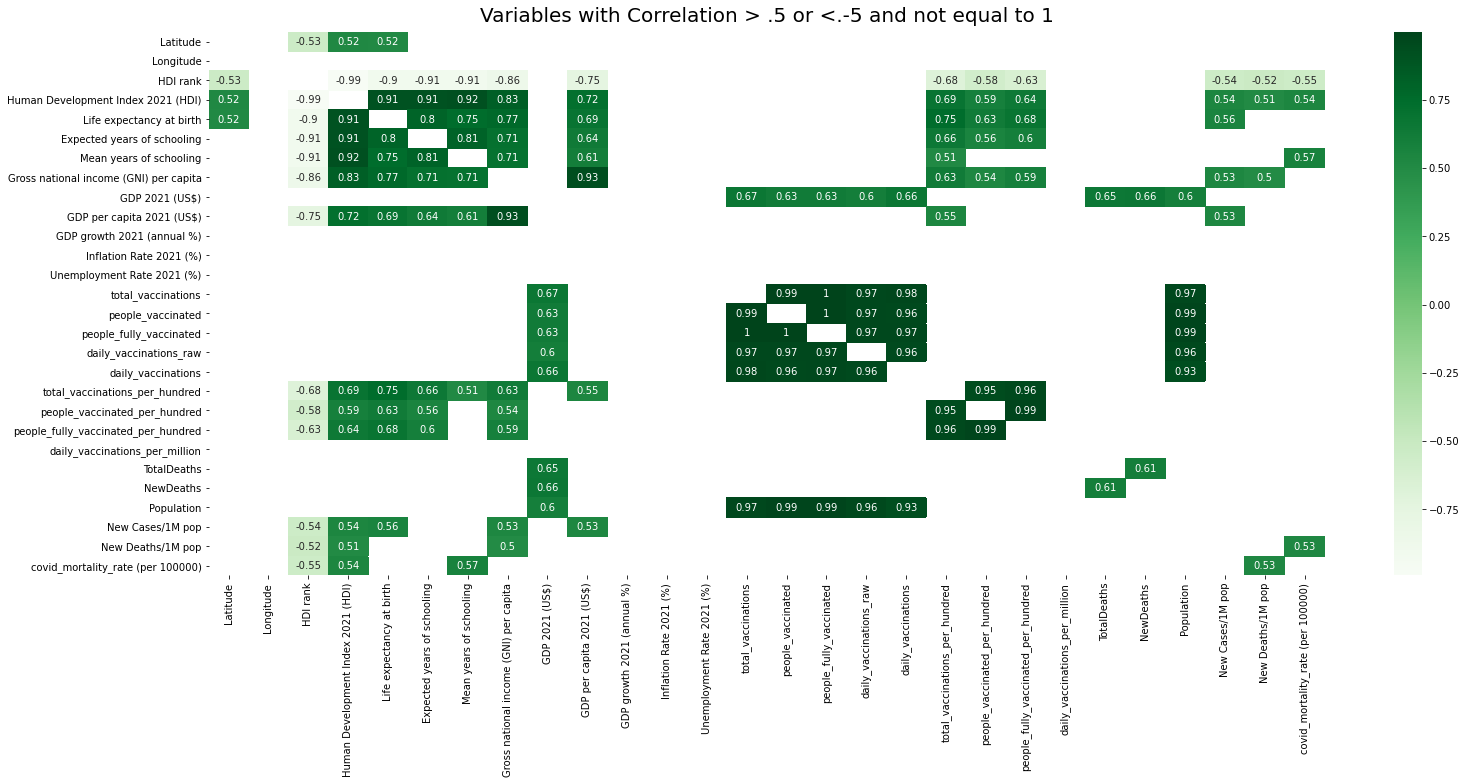

In [5]:
dfCorr = covidvisual.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(25,10))
plt.title('Variables with Correlation > .5 or <.-5 and not equal to 1',
          size=20, verticalalignment='bottom')
sns.heatmap(filteredDf, annot=True, cmap='Greens')
plt.show()

In [6]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [7]:
covidvisual.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
0  Albania          ALB      41.0       20.0        67   
1  Algeria          DZA      28.0        3.0        91   
2   Angola          AGO     -12.5       18.5       148   

   Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                               0.796                   76.4626   
1                               0.745                   76.3767   
2                               0.586                   61.6434   

   Expected years of schooling  Mean years of schooling  \
0                    14.448000                11.286455   
1                    14.626896                 8.069284   
2                    12.172100                 5.417391   

   Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                            14131.110390    1.825579e+10   
1                            10800.225460    1.630444e+11   
2                             5465.617791    6.740429e+10   

   GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                6492.872012                    8.515501   
1                3690.627878                    3.500000   
2                1953.533757                    1.100000   

   Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                 2.041472                      12.683   
1                 7.226063                      11.747   
2                25.754266                      10.384   

                       Region          IncomeGroup  total_vaccinations  \
0       Europe & Central Asia  Upper middle income             3070468   
1  Middle East & North Africa  Lower middle income            15267442   
2          Sub-Saharan Africa  Lower middle income            24867841   

         date  people_vaccinated  people_fully_vaccinated  \
0  2023-03-19            1347054                  1276432   
1  2022-09-04            7840131                  6481186   
2  2023-03-26           15510800                  8631439   

   daily_vaccinations_raw  daily_vaccinations  total_vaccinations_per_hundred  \
0                 23655.0               17565                          108.03   
1                147230.0              256927                           34.00   
2                     NaN              183173                           69.88   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          47.39                                44.91   
1                          17.46                                14.43   
2                          43.58                                24.25   

   daily_vaccinations_per_million Country,Other TotalCases NewCases  \
0                            6180       Albania    334,663      NaN   
1                            5722       Algeria    271,599       +5   
2                            5147        Angola    105,316      NaN   

   TotalDeaths  NewDeaths TotalRecovered NewRecovered ActiveCases  \
0         3602        NaN        329,352          NaN       1,709   
1         6881        NaN        182,893          NaN      81,825   
2         1933        NaN        103,342          NaN          41   

  Serious,Critical TotalTests  Population Continent  New Cases/1M pop  \
0              NaN  1,941,032     2866374    Europe               NaN   
1              NaN    230,861    45350148    Africa               0.1   
2              NaN  1,499,795    35027343    Africa               NaN   

   New Deaths/1M pop Active Cases/1M pop  covid_mortality_rate (per 100000)  
0                NaN                 596                         125.663992  
1                NaN               1,804                          15.173049  
2                NaN                   1                           5.518546

In [8]:
covidvisual.sort_values(by=['covid_mortality_rate (per 100000)'], ascending = False).head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
108      Peru          PER     -10.0      -76.0        84   
20   Bulgaria          BGR      43.0       25.0        68   
59    Hungary          HUN      47.0       20.0        46   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
108                               0.762                   72.3769   
20                                0.795                   71.7980   
59                                0.846                   74.5301   

     Expected years of schooling  Mean years of schooling  \
108                    15.387734                 9.885519   
20                     13.897290                11.413180   
59                     15.033628                12.249590   

     Gross national income (GNI) per capita  GDP 2021 (US$)  \
108                             12245.89366    2.232495e+11   
20                              23078.95595    8.405631e+10   
59                              32789.01063    1.818480e+11   

     GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
108                6621.574336                   13.349509   
20                12221.496606                    7.634610   
59                18728.121895                    7.117315   

     Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
108                 4.271664                        5.10   
20                  3.297744                        5.27   
59                  5.110965                        4.05   

                        Region          IncomeGroup  total_vaccinations  \
108  Latin America & Caribbean  Upper middle income            88627741   
20       Europe & Central Asia  Upper middle income             4610850   
59       Europe & Central Asia          High income            16701238   

           date  people_vaccinated  people_fully_vaccinated  \
108  2023-04-02           30411505                 28590369   
20   2023-04-04            2107140                  2076682   
59   2022-12-27            6420813                  6207249   

     daily_vaccinations_raw  daily_vaccinations  \
108                603818.0              390102   
20                  38117.0               27038   
59                 187488.0              125911   

     total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
108                          260.29                          89.32   
20                            67.99                          31.07   
59                           167.56                          64.42   

     people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
108                                83.97                           11457   
20                                 30.62                            3987   
59                                 62.28                           12632   

    Country,Other TotalCases NewCases  TotalDeaths  NewDeaths TotalRecovered  \
108          Peru  4,494,028      NaN       219837        NaN      4,270,272   
20       Bulgaria  1,300,621      NaN        38269        NaN      1,259,702   
59        Hungary  2,199,764     +618        48811        8.0      2,146,693   

    NewRecovered ActiveCases Serious,Critical  TotalTests  Population  \
108          NaN       3,919               35  38,354,895    33684208   
20           NaN       2,650               38  11,130,747     6844597   
59          +690       4,260                3  11,394,556     9606259   

         Continent  New Cases/1M pop  New Deaths/1M pop Active Cases/1M pop  \
108  South America               NaN                NaN                 116   
20          Europe               NaN                NaN                 387   
59          Europe              64.0                0.8                 443   

     covid_mortality_rate (per 100000)  
108                         652.641143  
20                          559.112538  
59                          508.116635

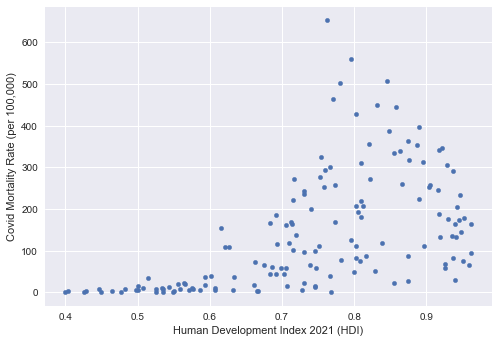

In [9]:
plt.style.use('seaborn')
covidvisual.plot(x='Human Development Index 2021 (HDI)', y='covid_mortality_rate (per 100000)', kind='scatter')
plt.ylabel('Covid Mortality Rate (per 100,000)')
plt.show()

In [10]:
#correlating the hdi with covid_mortality_rate, as control population, latitude can be used, income group (or gpd per capita);
#for an instrument, a variable that correlates with hdi but not directly to covid mortality rate, gdp per capita for example

## 7.1 Linear Regression

$$ 
Coviddeathrate_{i} = \beta_{0} + \beta_{1}HDI_{i} + u_{i}
$$

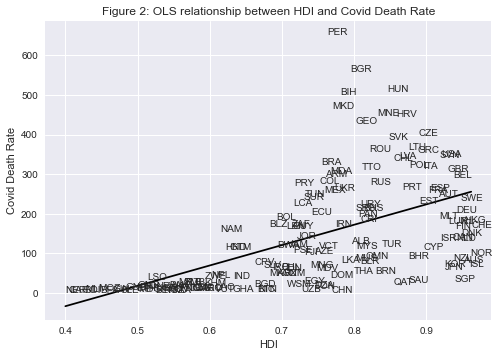

In [11]:
# Dropping NA's is required to use numpy's polyfit
df1_subset = covidvisual.dropna(subset=['covid_mortality_rate (per 100000)', 'Human Development Index 2021 (HDI)'])

# Use only 'base sample' for plotting purposes
#df1_subset = df1_subset[df1_subset['baseco'] == 1]

X = df1_subset['Human Development Index 2021 (HDI)']
y = df1_subset['covid_mortality_rate (per 100000)']
labels = df1_subset['Country Code']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

#ax.set_xlim([0,1])
#ax.set_ylim([0,300])
ax.set_xlabel('HDI')
ax.set_ylabel('Covid Death Rate')
ax.set_title('Figure 2: OLS relationship between HDI and Covid Death Rate')
plt.show()

In [12]:
#it might seem counterintuitive at first, as HDI increases Covid Death Rate increases
#it could be because of countries with higher HDI has higher mobility, or something else, let's find out

In [13]:
#adding a constant term prevents overall bias by forcing the residual mean to equal zero
#it's like moving the regression line up or down to the point where the residual mean equals zero
#that's why a constant term is usually added into a linear regression
#bias exists if the residuals have an overall positive or negative mean, the model makes predicitons that are too high or too low
#the constant term prevents overall bias by forcing the residual mean to equal zero

In [14]:
covidvisual['const'] = 1

In [15]:
covidvisual.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
0  Albania          ALB      41.0       20.0        67   
1  Algeria          DZA      28.0        3.0        91   
2   Angola          AGO     -12.5       18.5       148   

   Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                               0.796                   76.4626   
1                               0.745                   76.3767   
2                               0.586                   61.6434   

   Expected years of schooling  Mean years of schooling  \
0                    14.448000                11.286455   
1                    14.626896                 8.069284   
2                    12.172100                 5.417391   

   Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                            14131.110390    1.825579e+10   
1                            10800.225460    1.630444e+11   
2                             5465.617791    6.740429e+10   

   GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                6492.872012                    8.515501   
1                3690.627878                    3.500000   
2                1953.533757                    1.100000   

   Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                 2.041472                      12.683   
1                 7.226063                      11.747   
2                25.754266                      10.384   

                       Region          IncomeGroup  total_vaccinations  \
0       Europe & Central Asia  Upper middle income             3070468   
1  Middle East & North Africa  Lower middle income            15267442   
2          Sub-Saharan Africa  Lower middle income            24867841   

         date  people_vaccinated  people_fully_vaccinated  \
0  2023-03-19            1347054                  1276432   
1  2022-09-04            7840131                  6481186   
2  2023-03-26           15510800                  8631439   

   daily_vaccinations_raw  daily_vaccinations  total_vaccinations_per_hundred  \
0                 23655.0               17565                          108.03   
1                147230.0              256927                           34.00   
2                     NaN              183173                           69.88   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          47.39                                44.91   
1                          17.46                                14.43   
2                          43.58                                24.25   

   daily_vaccinations_per_million Country,Other TotalCases NewCases  \
0                            6180       Albania    334,663      NaN   
1                            5722       Algeria    271,599       +5   
2                            5147        Angola    105,316      NaN   

   TotalDeaths  NewDeaths TotalRecovered NewRecovered ActiveCases  \
0         3602        NaN        329,352          NaN       1,709   
1         6881        NaN        182,893          NaN      81,825   
2         1933        NaN        103,342          NaN          41   

  Serious,Critical TotalTests  Population Continent  New Cases/1M pop  \
0              NaN  1,941,032     2866374    Europe               NaN   
1              NaN    230,861    45350148    Africa               0.1   
2              NaN  1,499,795    35027343    Africa               NaN   

   New Deaths/1M pop Active Cases/1M pop  covid_mortality_rate (per 100000)  \
0                NaN                 596                         125.663992   
1                NaN               1,804                          15.173049   
2                NaN                   1                           5.518546   

   const  
0      1  
1      1  
2      1

In [16]:
#building the model
reg1 = sm.OLS(endog=covidvisual['covid_mortality_rate (per 100000)'], exog=covidvisual[['const', 'Human Development Index 2021 (HDI)']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

##### obtainning the parameter estimates 
$$ 
Coviddeathrate_{i} = \hat\beta_{0} + \hat\beta_{1}HDI_{i} + u_{i}
$$

In [17]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [18]:
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     covid_mortality_rate (per 100000)   R-squared:                       0.294
Model:                                           OLS   Adj. R-squared:                  0.290
Method:                                Least Squares   F-statistic:                     61.34
Date:                               Sun, 16 Apr 2023   Prob (F-statistic):           8.79e-13
Time:                                       16:13:18   Log-Likelihood:                -921.68
No. Observations:                                149   AIC:                             1847.
Df Residuals:                                    147   BIC:                             1853.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                                         coef    std err    

The intercept $ \hat\beta_{0} = -238.60 $ \
The slope $ \hat\beta_{1} = 513.93 $ \
The positive $ \hat\beta_{1} $ parameter estimate implies that HDI has a positive effect on covid death rate, that is the higher HDI, higher covid death rate \
The p-value of 0.000 for $ \hat\beta_{1} $ implies that the effect of HDI on covid death rate is statistically significant
(using p<0.05 as a rejection rule). \
The R-squared value of 0.294 indicates that around 29% of variation in covid death rate is explained by HDI

In [19]:
#using the parameter estimates

$$
\widehat{Coviddeathrate_{i}} = -238.60 + 513.93HDI_{i}
$$

In [20]:
#the equation above describes the line that best fits the data shown in Figure 2
#the equation can be used to predict the level of covid death rate for a value of HDI

In [21]:
mean_hdi = np.mean(df1_subset['Human Development Index 2021 (HDI)'])
mean_hdi

0.7379395973154366

In [22]:
predicted_coviddeathrate = -238.60 + 513.93 * 0.74
predicted_coviddeathrate

141.70819999999995

In [23]:
#for a country with HDI value of 0.74 (the average for the dataset), the predicted level of covid death rate is 141.70

In [24]:
#there's another way to do it, it's easier and more accurate, using predict(), setting constant = 1 and hdii = mean_hdi

In [25]:
results.predict(exog=[1, mean_hdi])

array([140.65166713])

In [26]:
#plotting the predicted values hdi and observed values covid death rate

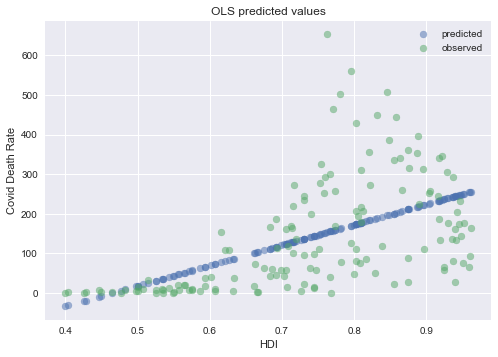

In [27]:
# Drop missing observations from whole sample

df1_plot = covidvisual.dropna(subset=['covid_mortality_rate (per 100000)', 'Human Development Index 2021 (HDI)'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(df1_plot['Human Development Index 2021 (HDI)'], results.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(df1_plot['Human Development Index 2021 (HDI)'], df1_plot['covid_mortality_rate (per 100000)'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('HDI')
ax.set_ylabel('Covid Death Rate')
plt.show()

## 7.2 Multivariate Regression Model

In [28]:
#that are many factors that influence covid death rate, and leaving out variables that affect it, will result in omitted variable bias
#yielding biased and inconsistent parameter estimates
#adding other factors will extend the linear regression model into multivariate regression model

In [29]:
#Factos such as:
#the effect on climate on covid death rate, latitude is used as a proxy
#(Latitude)
#population, in general it's harder to control countries with higher population, and the higher population more people can trasmit the virus
#(Population)
#people fully vaccinated per hundred, people who received all doses are less likely to die from the virus
#(people_fully_vaccinated_per_hundred)
#incomegroup, lower income groups are more likely to die from the virus cause the lack of resources, worse sanitation such as sewage treatment, 
#less access to treated water, and the lower income group are also more likely to share rooms with the same household, increasing the chance of transmitting the virus
#(IncomeGroup)-> since income group is categorical it won't be used in the regression

In [30]:
covidvisual.head()

Country Country Code  Latitude  Longitude  HDI rank  \
0    Albania          ALB      41.0       20.0        67   
1    Algeria          DZA      28.0        3.0        91   
2     Angola          AGO     -12.5       18.5       148   
3    Armenia          ARM      40.0       45.0        85   
4  Australia          AUS     -27.0      133.0         5   

   Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                               0.796                   76.4626   
1                               0.745                   76.3767   
2                               0.586                   61.6434   
3                               0.759                   72.0431   
4                               0.951                   84.5265   

   Expected years of schooling  Mean years of schooling  \
0                    14.448000                11.286455   
1                    14.626896                 8.069284   
2                    12.172100                 5.417391   
3                    13.116760                11.330300   
4                    21.054590                12.726820   

   Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                            14131.110390    1.825579e+10   
1                            10800.225460    1.630444e+11   
2                             5465.617791    6.740429e+10   
3                            13157.993900    1.386141e+10   
4                            49238.433350    1.552667e+12   

   GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                6492.872012                    8.515501   
1                3690.627878                    3.500000   
2                1953.533757                    1.100000   
3                4966.513471                    5.700000   
4               60443.109165                    2.236212   

   Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                 2.041472                      12.683   
1                 7.226063                      11.747   
2                25.754266                      10.384   
3                 7.184836                      12.729   
4                 2.863910                       5.120   

                       Region          IncomeGroup  total_vaccinations  \
0       Europe & Central Asia  Upper middle income             3070468   
1  Middle East & North Africa  Lower middle income            15267442   
2          Sub-Saharan Africa  Lower middle income            24867841   
3       Europe & Central Asia  Upper middle income             2153341   
4         East Asia & Pacific          High income            63681652   

         date  people_vaccinated  people_fully_vaccinated  \
0  2023-03-19            1347054                  1276432   
1  2022-09-04            7840131                  6481186   
2  2023-03-26           15510800                  8631439   
3  2023-03-05            1130844                   986762   
4  2023-02-02           22236698                 21654488   

   daily_vaccinations_raw  daily_vaccinations  total_vaccinations_per_hundred  \
0                 23655.0               17565                          108.03   
1                147230.0              256927                           34.00   
2                     NaN              183173                           69.88   
3                     NaN               17910                           77.45   
4                351226.0              295848                          243.27   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          47.39                                44.91   
1                          17.46                                14.43   
2                          43.58                                24.25   
3                          40.67                                35.49   
4                          84.95                                82.72   

   daily_vaccinations_per_million Country,Other  TotalCases NewCases  \

In [31]:
#lists of variables to be used in each regression
X1 = ['const', 'Human Development Index 2021 (HDI)']
X2 = ['const', 'Human Development Index 2021 (HDI)', 'Latitude']
X3 = ['const', 'Human Development Index 2021 (HDI)', 'Latitude','Population']
X4 = ['const', 'Human Development Index 2021 (HDI)', 'Latitude','Population','people_fully_vaccinated_per_hundred']
#X5 = ['const', 'Human Development Index 2019 (HDI)', 'Latitude','Population','people_fully_vaccinated_per_hundred','IncomeGroup']
#estimating an OLS regression for each set of variables
reg1 = sm.OLS(covidvisual['covid_mortality_rate (per 100000)'], covidvisual[X1], missing='drop').fit()
reg2 = sm.OLS(covidvisual['covid_mortality_rate (per 100000)'], covidvisual[X2], missing='drop').fit()
reg3 = sm.OLS(covidvisual['covid_mortality_rate (per 100000)'], covidvisual[X3], missing='drop').fit()
reg4 = sm.OLS(covidvisual['covid_mortality_rate (per 100000)'], covidvisual[X4], missing='drop').fit()
#reg5 = sm.OLS(covidvisual['covid_mortality_rate (per 100000)'], covidvisual[X5], missing='drop').fit()

In [32]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1,reg2,reg3, reg4],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'Human Development Index 2021 (HDI)',
                                             'Latitude',
                                             'Population',
                                             'people_fully_vaccinated_per_hundred'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)

                           Table 2 - OLS Regressions
                                     Model 1    Model 2    Model 3    Model 4  
-------------------------------------------------------------------------------
const                               -238.60*** -205.68*** -197.50*** -250.94***
                                    (49.38)    (53.04)    (53.22)    (54.88)   
Human Development Index 2021 (HDI)  513.93***  448.55***  441.63***  644.98*** 
                                    (65.62)    (76.46)    (76.40)    (101.13)  
Latitude                                       0.75       0.78*      0.40      
                                               (0.45)     (0.45)     (0.46)    
Population                                                -0.00      -0.00     
                                                          (0.00)     (0.00)    
people_fully_vaccinated_per_hundred                                  -1.61***  
                                                                   

In [33]:
#population and people fully vaccinated did not show significant 
#as for HDI, it showed statistically significant throghout all models  for p<.01, meaning that higher HDI impacts into higher covid death rate
#Latitude was not significant 
#latitude ranges from -90 to 90, at the equator is 0, above is positve until 90 and below is negative until 90

## 7.3 Endogeneity

In [34]:
#OLS models are likely to suffer from endogeneity issues, resulting in biased and inconsistent model estimates
#there's likely a two-way relationship between HDI and covid death rate

#higher covid death rate can be because of higher mobility, richer people can afford to travel more, in and out of the country
#variables that affect covid death rate may also be correlated with HDI

#to deal with endogeneity, two-stage least squares (2SLS) regression, an extension of OLS regression, can be used

### 7.3.1 Two-stage least squares (2SLS) regression

In [35]:
#this method requires replacing the endogenous variable HDIi, with a variable that is:
#1. correlated with HDIi
#2. not correlated with the error term (ie. it should not directly affect the dependent variable (in this case covid death rate),
#otherwise it would be correlated with ui due to omitted variable bias)

#the new set of regressor is called an intrument, which aims to remove endogeneity in our HDI variable

In [36]:
# an option for an instrument could be inflation rate or unemployment rate, each one is correlated with HDI,
#because countries that have lower unemployment rate tend to have a higher HDI
#and also countries that have lower inflation rate tend to have a higher HDI
#both, inflation rate nor unemployment rate is correlated dirrectly to covid death rate
#let's find out which one would be a better instrument

In [37]:
covidvisual.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
0  Albania          ALB      41.0       20.0        67   
1  Algeria          DZA      28.0        3.0        91   
2   Angola          AGO     -12.5       18.5       148   

   Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                               0.796                   76.4626   
1                               0.745                   76.3767   
2                               0.586                   61.6434   

   Expected years of schooling  Mean years of schooling  \
0                    14.448000                11.286455   
1                    14.626896                 8.069284   
2                    12.172100                 5.417391   

   Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                            14131.110390    1.825579e+10   
1                            10800.225460    1.630444e+11   
2                             5465.617791    6.740429e+10   

   GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                6492.872012                    8.515501   
1                3690.627878                    3.500000   
2                1953.533757                    1.100000   

   Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                 2.041472                      12.683   
1                 7.226063                      11.747   
2                25.754266                      10.384   

                       Region          IncomeGroup  total_vaccinations  \
0       Europe & Central Asia  Upper middle income             3070468   
1  Middle East & North Africa  Lower middle income            15267442   
2          Sub-Saharan Africa  Lower middle income            24867841   

         date  people_vaccinated  people_fully_vaccinated  \
0  2023-03-19            1347054                  1276432   
1  2022-09-04            7840131                  6481186   
2  2023-03-26           15510800                  8631439   

   daily_vaccinations_raw  daily_vaccinations  total_vaccinations_per_hundred  \
0                 23655.0               17565                          108.03   
1                147230.0              256927                           34.00   
2                     NaN              183173                           69.88   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          47.39                                44.91   
1                          17.46                                14.43   
2                          43.58                                24.25   

   daily_vaccinations_per_million Country,Other TotalCases NewCases  \
0                            6180       Albania    334,663      NaN   
1                            5722       Algeria    271,599       +5   
2                            5147        Angola    105,316      NaN   

   TotalDeaths  NewDeaths TotalRecovered NewRecovered ActiveCases  \
0         3602        NaN        329,352          NaN       1,709   
1         6881        NaN        182,893          NaN      81,825   
2         1933        NaN        103,342          NaN          41   

  Serious,Critical TotalTests  Population Continent  New Cases/1M pop  \
0              NaN  1,941,032     2866374    Europe               NaN   
1              NaN    230,861    45350148    Africa               0.1   
2              NaN  1,499,795    35027343    Africa               NaN   

   New Deaths/1M pop Active Cases/1M pop  covid_mortality_rate (per 100000)  \
0                NaN                 596                         125.663992   
1                NaN               1,804                          15.173049   
2                NaN                   1                           5.518546   

   const  
0      1  
1      1  
2      1

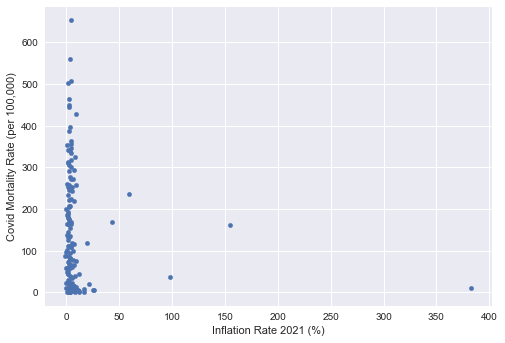

In [38]:
plt.style.use('seaborn')
covidvisual.plot(x='Inflation Rate 2021 (%)', y='covid_mortality_rate (per 100000)', kind='scatter')
plt.ylabel('Covid Mortality Rate (per 100,000)')
plt.show()

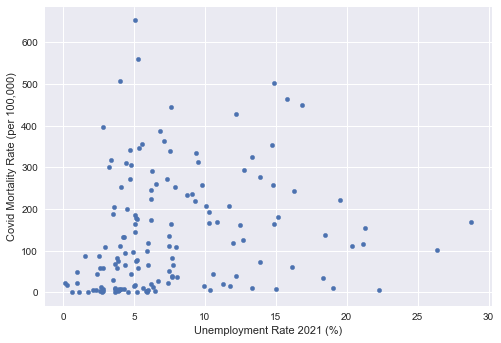

In [39]:
plt.style.use('seaborn')
covidvisual.plot(x='Unemployment Rate 2021 (%)', y='covid_mortality_rate (per 100000)', kind='scatter')
plt.ylabel('Covid Mortality Rate (per 100,000)')
plt.show()

In [40]:
#both inflation rate nor unemployment rate shows correlation with covid death rate, which is a good sign for the instrument
#it has to be correlated with the independent variable HDI and not with the dependent variable covid death rate

In [41]:
px.scatter(covidvisual, x='Inflation Rate 2021 (%)', y='Human Development Index 2021 (HDI)', trendline='ols')

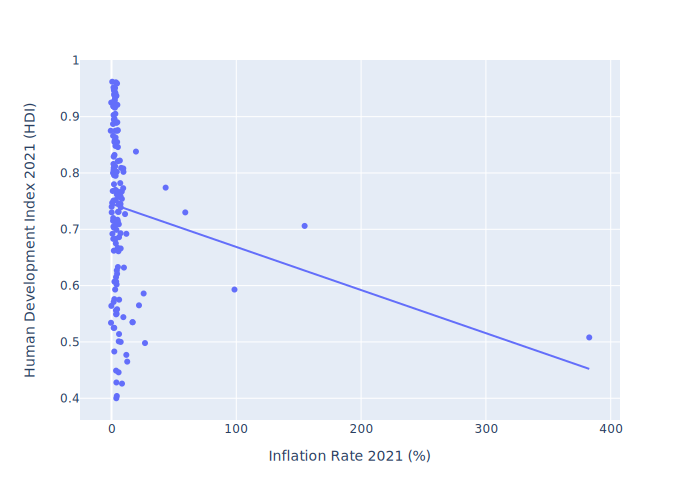

In [42]:
fig = px.scatter(covidvisual, x='Inflation Rate 2021 (%)', y='Human Development Index 2021 (HDI)', trendline='ols')
fig.show('svg')

In [43]:
px.scatter(covidvisual, x='Unemployment Rate 2021 (%)', y='Human Development Index 2021 (HDI)', trendline='ols')

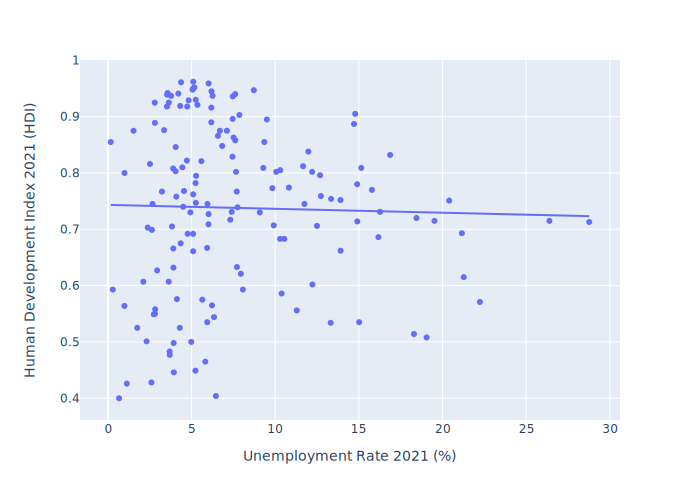

In [44]:
fig = px.scatter(covidvisual, x='Unemployment Rate 2021 (%)', y='Human Development Index 2021 (HDI)', trendline='ols')
fig.show('svg')

In [45]:
#inflation rate will be used as instrument because it shows a correlation (negative) with HDI
#a country with a higher inflation rate tends to present a lower HDI, 
#meanwhile inflation rate is not directly correlated with covid death rate

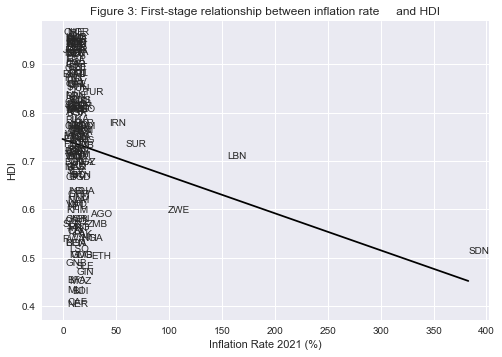

In [46]:
# Dropping NA's is required to use numpy's polyfit
df1_subset2 = covidvisual.dropna(subset=['Inflation Rate 2021 (%)', 'Human Development Index 2021 (HDI)'])

X = df1_subset2['Inflation Rate 2021 (%)']
y = df1_subset2['Human Development Index 2021 (HDI)']
labels = df1_subset2['Country Code']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

#ax.set_xlim([1.8,8.4])
#ax.set_ylim([3.3,10.4])
ax.set_xlabel('Inflation Rate 2021 (%)')
ax.set_ylabel('HDI')
ax.set_title('Figure 3: First-stage relationship between inflation rate \
    and HDI')
plt.show()

#### 7.3.1.1 First Stage

In [47]:
#the first stage involves regressing the endogenous variable (HDIi) on the instrument
#the instrument is the set of all exonegous variables in the model (not just the variable replaced)
#on model 1, the instrument is a constant and inflation rate
#thus, the first-stage regression estimated is

$$ 
HDI_{i} = \delta_{0} + \delta_{1}inflationrate_{i} +v_{i}
$$

In [48]:
covidvisual.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
0  Albania          ALB      41.0       20.0        67   
1  Algeria          DZA      28.0        3.0        91   
2   Angola          AGO     -12.5       18.5       148   

   Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                               0.796                   76.4626   
1                               0.745                   76.3767   
2                               0.586                   61.6434   

   Expected years of schooling  Mean years of schooling  \
0                    14.448000                11.286455   
1                    14.626896                 8.069284   
2                    12.172100                 5.417391   

   Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                            14131.110390    1.825579e+10   
1                            10800.225460    1.630444e+11   
2                             5465.617791    6.740429e+10   

   GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                6492.872012                    8.515501   
1                3690.627878                    3.500000   
2                1953.533757                    1.100000   

   Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                 2.041472                      12.683   
1                 7.226063                      11.747   
2                25.754266                      10.384   

                       Region          IncomeGroup  total_vaccinations  \
0       Europe & Central Asia  Upper middle income             3070468   
1  Middle East & North Africa  Lower middle income            15267442   
2          Sub-Saharan Africa  Lower middle income            24867841   

         date  people_vaccinated  people_fully_vaccinated  \
0  2023-03-19            1347054                  1276432   
1  2022-09-04            7840131                  6481186   
2  2023-03-26           15510800                  8631439   

   daily_vaccinations_raw  daily_vaccinations  total_vaccinations_per_hundred  \
0                 23655.0               17565                          108.03   
1                147230.0              256927                           34.00   
2                     NaN              183173                           69.88   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          47.39                                44.91   
1                          17.46                                14.43   
2                          43.58                                24.25   

   daily_vaccinations_per_million Country,Other TotalCases NewCases  \
0                            6180       Albania    334,663      NaN   
1                            5722       Algeria    271,599       +5   
2                            5147        Angola    105,316      NaN   

   TotalDeaths  NewDeaths TotalRecovered NewRecovered ActiveCases  \
0         3602        NaN        329,352          NaN       1,709   
1         6881        NaN        182,893          NaN      81,825   
2         1933        NaN        103,342          NaN          41   

  Serious,Critical TotalTests  Population Continent  New Cases/1M pop  \
0              NaN  1,941,032     2866374    Europe               NaN   
1              NaN    230,861    45350148    Africa               0.1   
2              NaN  1,499,795    35027343    Africa               NaN   

   New Deaths/1M pop Active Cases/1M pop  covid_mortality_rate (per 100000)  \
0                NaN                 596                         125.663992   
1                NaN               1,804                          15.173049   
2                NaN                   1                           5.518546   

   const  
0      1  
1      1  
2      1

In [49]:
# Fit the first stage regression and print summary
results_fs = sm.OLS(covidvisual['Human Development Index 2021 (HDI)'],
                    covidvisual[['const', 'Inflation Rate 2021 (%)']],
                    missing='drop').fit()
print(results_fs.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Human Development Index 2021 (HDI)   R-squared:                       0.032
Model:                                            OLS   Adj. R-squared:                  0.026
Method:                                 Least Squares   F-statistic:                     4.876
Date:                                Sun, 16 Apr 2023   Prob (F-statistic):             0.0288
Time:                                        16:13:26   Log-Likelihood:                 75.937
No. Observations:                                 149   AIC:                            -147.9
Df Residuals:                                     147   BIC:                            -141.9
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                              coef    std err     

#### 7.3.1.2 Second Stage

There's the need to retrieve the predicted values of HDIi using .predict()
then replace the endogenous variable HDIi with the predicted values $ \widehat{HDI_i} $ in the original linear model
the second stage regression is the following:

$$ 
Coviddeathrate_{i} = \beta_{0} + \beta_{1}\widehat{HDI_i} + u_{i}
$$

In [50]:
covidvisual['predicted_HDI'] = results_fs.predict()

results_ss = sm.OLS(covidvisual['covid_mortality_rate (per 100000)'],
                    covidvisual[['const', 'predicted_HDI']], missing = 'drop').fit()
print(results_ss.summary())

                                    OLS Regression Results                                   
Dep. Variable:     covid_mortality_rate (per 100000)   R-squared:                       0.008
Model:                                           OLS   Adj. R-squared:                  0.002
Method:                                Least Squares   F-statistic:                     1.247
Date:                               Sun, 16 Apr 2023   Prob (F-statistic):              0.266
Time:                                       16:13:26   Log-Likelihood:                -947.03
No. Observations:                                149   AIC:                             1898.
Df Residuals:                                    147   BIC:                             1904.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                    coef    std err          t      P>|t|   

In [51]:
#the second stage results in a p-value that is not statistically significant
#indicating the second-stage regression results does not give an unbiased and conssitent estimate of the effect of 
#HDI on covid death rate, the inflation rate is not a good instrument, and HDI is not endogenous according to the 
#Hausman Test used after the IV2SLS 

In [52]:
covidvisual.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
0  Albania          ALB      41.0       20.0        67   
1  Algeria          DZA      28.0        3.0        91   
2   Angola          AGO     -12.5       18.5       148   

   Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                               0.796                   76.4626   
1                               0.745                   76.3767   
2                               0.586                   61.6434   

   Expected years of schooling  Mean years of schooling  \
0                    14.448000                11.286455   
1                    14.626896                 8.069284   
2                    12.172100                 5.417391   

   Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                            14131.110390    1.825579e+10   
1                            10800.225460    1.630444e+11   
2                             5465.617791    6.740429e+10   

   GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                6492.872012                    8.515501   
1                3690.627878                    3.500000   
2                1953.533757                    1.100000   

   Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                 2.041472                      12.683   
1                 7.226063                      11.747   
2                25.754266                      10.384   

                       Region          IncomeGroup  total_vaccinations  \
0       Europe & Central Asia  Upper middle income             3070468   
1  Middle East & North Africa  Lower middle income            15267442   
2          Sub-Saharan Africa  Lower middle income            24867841   

         date  people_vaccinated  people_fully_vaccinated  \
0  2023-03-19            1347054                  1276432   
1  2022-09-04            7840131                  6481186   
2  2023-03-26           15510800                  8631439   

   daily_vaccinations_raw  daily_vaccinations  total_vaccinations_per_hundred  \
0                 23655.0               17565                          108.03   
1                147230.0              256927                           34.00   
2                     NaN              183173                           69.88   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          47.39                                44.91   
1                          17.46                                14.43   
2                          43.58                                24.25   

   daily_vaccinations_per_million Country,Other TotalCases NewCases  \
0                            6180       Albania    334,663      NaN   
1                            5722       Algeria    271,599       +5   
2                            5147        Angola    105,316      NaN   

   TotalDeaths  NewDeaths TotalRecovered NewRecovered ActiveCases  \
0         3602        NaN        329,352          NaN       1,709   
1         6881        NaN        182,893          NaN      81,825   
2         1933        NaN        103,342          NaN          41   

  Serious,Critical TotalTests  Population Continent  New Cases/1M pop  \
0              NaN  1,941,032     2866374    Europe               NaN   
1              NaN    230,861    45350148    Africa               0.1   
2              NaN  1,499,795    35027343    Africa               NaN   

   New Deaths/1M pop Active Cases/1M pop  covid_mortality_rate (per 100000)  \
0                NaN                 596                         125.663992   
1                NaN               1,804                          15.173049   
2                NaN                   1                           5.518546   

   const  predicted_HDI  
0      1       0.743616  
1      1       0.739647  
2      1       0.725463

In [53]:
iv = IV2SLS(dependent=covidvisual['covid_mortality_rate (per 100000)'],
            exog=covidvisual['const'],
            endog=covidvisual['Human Development Index 2021 (HDI)'],
            instruments=covidvisual['Inflation Rate 2021 (%)']).fit(cov_type='unadjusted')

print(iv.summary)

                                  IV-2SLS Estimation Summary                                 
Dep. Variable:     covid_mortality_rate (per 100000)   R-squared:                      0.2935
Estimator:                                   IV-2SLS   Adj. R-squared:                 0.2887
No. Observations:                                149   F-statistic:                    1.7746
Date:                               Sun, Apr 16 2023   P-value (F-stat)                0.1828
Time:                                       16:13:26   Distribution:                  chi2(1)
Cov. Estimator:                           unadjusted                                         
                                                                                             
                                         Parameter Estimates                                          
                                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------

In [54]:
#the p value is not significant meaning the estimates are not consistent nor unbiased, but if it were interpreting the results
#there's the marginal effect of 484.88 to calculate the difference in the hdi index implies difference in covid death rate

#### 7.3.2 Hausman Test

In [55]:
#besides identifying endogeneity by thinking about the data and model, there's a test for endogeneity, it's called Hausman test
#to test the correlation between the endogenous variable, HDIi, and the errors, ui

$$
H_{0}: Cov({HDI_i},u_{i}) = 0 \ (no \ endogeneity) \\
H_{1}: Cov({HDI_i},u_{i}) \neq 0 \ (endogeneity)
$$

In [56]:
#the test is run in two stages
#first regressing the independent variable (HDIi) on the instrument (inflationratei)

$$ 
HDI_{i} = \pi_{0} + \pi_{1}inflationrate_{i} +v_{i}
$$

second retrieving the residuals $ \hat{v_{i}} $ and including them in the original equation

$$ 
Coviddeathrate_{i} = \beta_{0} + \beta_{1}{HDI_i} + \alpha\hat{v_i} + u_{i}
$$

If $\alpha$ is statistically significant (with a p-value < 0.05), then we reject the null hypothesis and conclude that $HDI_{i}$ is endogenous.
Estimating the Hausman Test and interpreting the results

In [57]:
# Estimate the first stage regression
reg1 = sm.OLS(endog=covidvisual['Human Development Index 2021 (HDI)'],
              exog=covidvisual[['const', 'Inflation Rate 2021 (%)']],
              missing='drop').fit()

# Retrieve the residuals
covidvisual['resid'] = reg1.resid

# Estimate the second stage residuals
reg2 = sm.OLS(endog=covidvisual['covid_mortality_rate (per 100000)'],
              exog=covidvisual[['const', 'Human Development Index 2021 (HDI)', 'resid']],
              missing='drop').fit()

print(reg2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     covid_mortality_rate (per 100000)   R-squared:                       0.294
Model:                                           OLS   Adj. R-squared:                  0.285
Method:                                Least Squares   F-statistic:                     30.47
Date:                               Sun, 16 Apr 2023   Prob (F-statistic):           8.75e-12
Time:                                       16:13:26   Log-Likelihood:                -921.67
No. Observations:                                149   AIC:                             1849.
Df Residuals:                                    146   BIC:                             1858.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                                         coef    std err    

In [58]:
#the output shows that the coefficient on the residuals is not statistically significant, 
#indicating HDIi is not endogenous

#if the coefficient on the residuals were statistically significant, HDIi would be endogenous

### 7.4 The OLS parameter 𝛽 estimated using matrix algebra and numpy

In [59]:
#the linear equation to estimate written in matrix form is 

y = X$\beta$ + u

In [60]:
#to solve the unknown parameter B, we want to minimize the sum of squared residuals

${\displaystyle\min_\hat{\beta}} \ \hat{u}' \ \hat{u}$

In [61]:
#isolating u on the first equation and substituting into the second equation

${\displaystyle\min_\hat{\beta}} \ (Y - X \hat{\beta})'(Y - X \hat{\beta})$

optimizing the problem gives the solution for the  $\hat{\beta}$ coefficients

$\hat{\beta} = (X'X)^{-1}X'y$

computing $\hat{\beta}$ from the model using numpy, the results should be the same as using statsmodels

In [62]:
df1 = covidvisual.dropna(subset=['covid_mortality_rate (per 100000)', 'Human Development Index 2021 (HDI)'])
# Define the X and y variables
y = np.asarray(df1['covid_mortality_rate (per 100000)'])
X = np.asarray(df1[['const', 'Human Development Index 2021 (HDI)']])

# Compute β_hat
β_hat = np.linalg.solve(X.T @ X, X.T @ y)

# Print out the results from the 2 x 1 vector β_hat
print(f'β_0 = {β_hat[0]:.2}')
print(f'β_1 = {β_hat[1]:.2}')

β_0 = -2.4e+02
β_1 = 5.1e+02


In [63]:
#exactly the same results

In [64]:
reg1 = sm.OLS(endog=covidvisual['covid_mortality_rate (per 100000)'], exog=covidvisual[['const', 'Human Development Index 2021 (HDI)']], \
    missing='drop')
type(reg1)

results = reg1.fit()
type(results)

print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     covid_mortality_rate (per 100000)   R-squared:                       0.294
Model:                                           OLS   Adj. R-squared:                  0.290
Method:                                Least Squares   F-statistic:                     61.34
Date:                               Sun, 16 Apr 2023   Prob (F-statistic):           8.79e-13
Time:                                       16:13:26   Log-Likelihood:                -921.68
No. Observations:                                149   AIC:                             1847.
Df Residuals:                                    147   BIC:                             1853.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                                         coef    std err    

The intercept $ \hat\beta_{0} = -238.60 $ \
The slope $ \hat\beta_{1} = 513.93 $ 

### 7.5 Regression Discontinuity Design (RDD)

In [65]:
covidvisual = pd.read_excel('covidvisualApril5th2023.xlsx')

In [66]:
covidvisual

Country Country Code  Latitude  Longitude  HDI rank  \
0       Albania          ALB      41.0       20.0        67   
1       Algeria          DZA      28.0        3.0        91   
2        Angola          AGO     -12.5       18.5       148   
3       Armenia          ARM      40.0       45.0        85   
4     Australia          AUS     -27.0      133.0         5   
..          ...          ...       ...        ...       ...   
144  Uzbekistan          UZB      41.0       64.0       101   
145     Vanuatu          VUT     -16.0      167.0       140   
146    Viet Nam          VNM      16.0      106.0       115   
147      Zambia          ZMB     -15.0       30.0       154   
148    Zimbabwe          ZWE     -20.0       30.0       146   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                                 0.796                   76.4626   
1                                 0.745                   76.3767   
2                                 0.586                   61.6434   
3                                 0.759                   72.0431   
4                                 0.951                   84.5265   
..                                  ...                       ...   
144                               0.727                   70.8616   
145                               0.607                   70.4490   
146                               0.703                   73.6181   
147                               0.565                   61.2234   
148                               0.593                   59.2531   

     Expected years of schooling  Mean years of schooling  \
0                      14.448000                11.286455   
1                      14.626896                 8.069284   
2                      12.172100                 5.417391   
3                      13.116760                11.330300   
4                      21.054590                12.726820   
..                           ...                      ...   
144                    12.477140                11.895590   
145                    11.535315                 7.064846   
146                    12.951932                 8.370280   
147                    10.928760                 7.187091   
148                    12.110969                 8.710909   

     Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                              14131.110390    1.825579e+10   
1                              10800.225460    1.630444e+11   
2                               5465.617791    6.740429e+10   
3                              13157.993900    1.386141e+10   
4                              49238.433350    1.552667e+12   
..                                      ...             ...   
144                             7916.785725    6.923890e+10   
145                             3085.411633    9.563327e+08   
146                             7867.371345    3.661376e+11   
147                             3217.767739    2.214763e+10   
148                             3809.887158    2.837124e+10   

     GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                  6492.872012                    8.515501   
1                  3690.627878                    3.500000   
2                  1953.533757                    1.100000   
3                  4966.513471                    5.700000   
4                 60443.109165                    2.236212   
..                         ...                         ...   
144                1983.064723                    7.420110   
145                2996.621062                    0.449256   
146                3756.489121                    2.561551   
147                1137.343633                    4.598734   
148                1773.920411                    8.468017   

     Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                   2.041472                      12.683   
1                   7.226063                      11.747   
2      

In [67]:
covidvisual.shape

(149, 43)

In [68]:
covidvisual.sort_values(by = 'people_fully_vaccinated_per_hundred', ascending = False)

Country Country Code  Latitude  Longitude  HDI rank  \
112              Qatar          QAT   25.5000    51.2500        42   
19   Brunei Darussalam          BRN    4.5000   114.6667        51   
122          Singapore          SGP    1.3667   103.8000        12   
58           Hong Kong          HKG   22.2500   114.1667         4   
28               Chile          CHL  -30.0000   -71.0000        42   
..                 ...          ...       ...        ...       ...   
24            Cameroon          CMR    6.0000    12.0000       151   
81          Madagascar          MDG  -20.0000    47.0000       173   
106   Papua New Guinea          PNG   -6.0000   147.0000       156   
56               Haiti          HTI   19.0000   -72.4167       163   
22             Burundi          BDI   -3.5000    30.0000       187   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
112                               0.855                   79.2716   
19                                0.829                   74.6424   
122                               0.939                   82.7545   
58                                0.952                   85.4734   
28                                0.855                   78.9435   
..                                  ...                       ...   
24                                0.576                   60.3334   
81                                0.501                   64.4853   
106                               0.558                   65.3506   
56                                0.535                   63.1924   
22                                0.426                   61.6627   

     Expected years of schooling  Mean years of schooling  \
112                    12.637220                 9.996011   
19                     13.951780                 9.180000   
122                    16.524321                11.924880   
58                     17.278170                12.226210   
28                     16.731300                10.934966   
..                           ...                      ...   
24                     13.108599                 6.151310   
81                     10.134991                 5.120469   
106                    10.360771                 4.740000   
56                      9.700000                 5.554000   
22                     10.722722                 3.129267   

     Gross national income (GNI) per capita  GDP 2021 (US$)  \
112                            87134.134690    1.796772e+11   
19                             64489.539540    1.400657e+10   
122                            90918.644710    3.969869e+11   
58                             62606.845400    3.691764e+11   
28                             24563.244860    3.170585e+11   
..                                      ...             ...   
24                              3620.932408    4.533828e+10   
81                              1483.520983    1.447260e+10   
106                             4008.623573    2.659431e+10   
56                              2847.500746    2.094439e+10   
22                               731.786709    2.779813e+09   

     GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
112               66838.357433                    1.590757   
19                31449.076562                   -1.590762   
122               72794.003023                    7.613963   
58                49800.542414                    6.343106   
28                16265.095977                   11.668225   
..                         ...                         ...   
24                 1666.932734                    3.649917   
81                  500.511032                    4.402340   
106                2672.945790                    0.300000   
56                 1829.593044                   -1.798240   
22                  221.477676                    1.795300   

     Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
112                 2.304466                      

In [69]:
covidvisual['people_fully_vaccinated_per_hundred'].mean()

56.137583892617464

In [70]:
covidvisual['people_fully_vaccinated_per_hundred'].median()

62.31

In [71]:
covidvisual['people_fully_vaccinated_per_hundred'].isna().sum()

0

In [72]:
covidvisual['IncomeGroup'].value_counts()

High income            49
Lower middle income    44
Upper middle income    40
Low income             16
Name: IncomeGroup, dtype: int64

In [73]:
covidvisual['people_fully_vaccinated_per_hundred'].mean()

56.137583892617464

In [74]:
covidvisual.groupby(['IncomeGroup'])['people_fully_vaccinated_per_hundred'].mean()

IncomeGroup
High income            73.929592
Low income             30.041250
Lower middle income    48.477955
Upper middle income    53.206500
Name: people_fully_vaccinated_per_hundred, dtype: float64

In [75]:
covidvisual.groupby(['IncomeGroup'])['people_fully_vaccinated_per_hundred'].median()

IncomeGroup
High income            74.750
Low income             28.110
Lower middle income    50.030
Upper middle income    49.995
Name: people_fully_vaccinated_per_hundred, dtype: float64

In [76]:
covidvisual[covidvisual['IncomeGroup']=='High income']

Country Country Code  Latitude  Longitude  HDI rank  \
4              Australia          AUS  -27.0000   133.0000         5   
5                Austria          AUT   47.3333    13.3333        25   
7                Bahamas          BHS   24.2500   -76.0000        55   
8                Bahrain          BHR   26.0000    50.5500        35   
11               Belgium          BEL   50.8333     4.0000        13   
19     Brunei Darussalam          BRN    4.5000   114.6667        51   
25                Canada          CAN   60.0000   -95.0000        15   
28                 Chile          CHL  -30.0000   -71.0000        42   
34               Croatia          HRV   45.1667    15.5000        40   
35                Cyprus          CYP   35.0000    33.0000        29   
36        Czech Republic          CZE   49.7500    15.5000        32   
37               Denmark          DNK   56.0000    10.0000         6   
42               Estonia          EST   59.0000    26.0000        31   
45               Finland          FIN   64.0000    26.0000        11   
46                France          FRA   46.0000     2.0000        28   
49               Germany          DEU   51.0000     9.0000         9   
51                Greece          GRC   39.0000    22.0000        33   
58             Hong Kong          HKG   22.2500   114.1667         4   
59               Hungary          HUN   47.0000    20.0000        46   
60               Iceland          ISL   65.0000   -18.0000         3   
65               Ireland          IRL   53.0000    -8.0000         8   
66                Israel          ISR   31.5000    34.7500        22   
67                 Italy          ITA   42.8333    12.8333        30   
69                 Japan          JPN   36.0000   138.0000        19   
72           South Korea          KOR   37.0000   127.5000        19   
75                Latvia          LVA   57.0000    25.0000        39   
78             Lithuania          LTU   56.0000    24.0000        35   
79            Luxembourg          LUX   49.7500     6.1667        17   
85                 Malta          MLT   35.8333    14.5833        23   
96           Netherlands          NLD   52.5000     5.7500        10   
97           New Zealand          NZL  -41.0000   174.0000        13   
101               Norway          NOR   62.0000    10.0000         2   
102                 Oman          OMN   21.0000    57.0000        54   
105               Panama          PAN    9.0000   -80.0000        61   
110               Poland          POL   52.0000    20.0000        34   
111             Portugal          PRT   39.5000    -8.0000        38   
112                Qatar          QAT   25.5000    51.2500        42   
113              Romania          ROU   46.0000    25.0000        53   
119         Saudi Arabia          SAU   25.0000    45.0000        35   
122            Singapore          SGP    1.3667   103.8000        12   
123             Slovakia          SVK   48.6667    19.5000        45   
124             Slovenia          SVN   46.0000    15.0000        23   
127                Spain          ESP   40.0000    -4.0000        27   
131               Sweden          SWE   62.0000    15.0000         7   
132          Switzerland          CHE   47.0000     8.0000         1   
136  Trinidad and Tobago          TTO   11.0000   -61.0000        57   
141       United Kingdom          GBR   54.0000    -2.0000        18   
142        United States          USA   38.0000   -97.0000        21   
143              Uruguay          URY  -33.0000   -56.0000        58   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
4                                 0.951                   84.5265   
5                                 0.916                   81.5797   
7                                 0.812                   71.5983   
8                                 0.875                   78.7605   
11                                0.937                   81.8787   
19

In [77]:
len(covidvisual[covidvisual['IncomeGroup']=='High income'])

49

In [78]:
#in order to use RDD let's get the cut off to be around the median of 74 for High Income Group 
#since there's a higher number of observations the high income group, this group will be used cause it has similar characteristics

In [79]:
covidhighincomerdd = covidvisual[covidvisual['IncomeGroup']=='High income']

In [80]:
covidhighincomerdd.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
4  Australia          AUS  -27.0000   133.0000         5   
5    Austria          AUT   47.3333    13.3333        25   
7    Bahamas          BHS   24.2500   -76.0000        55   

   Human Development Index 2021 (HDI)  Life expectancy at birth  \
4                               0.951                   84.5265   
5                               0.916                   81.5797   
7                               0.812                   71.5983   

   Expected years of schooling  Mean years of schooling  \
4                    21.054590                12.726820   
5                    16.007959                12.256690   
7                    12.899450                12.641924   

   Gross national income (GNI) per capita  GDP 2021 (US$)  \
4                             49238.43335    1.552667e+12   
5                             53618.67138    4.803684e+11   
7                             30486.18429    1.120860e+10   

   GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
4               60443.109165                    2.236212   
5               53637.705711                    4.556851   
7               27478.389629                   13.719735   

   Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
4                 2.863910                       5.120   
5                 2.766667                       6.180   
7                 2.904913                      11.665   

                      Region  IncomeGroup  total_vaccinations        date  \
4        East Asia & Pacific  High income            63681652  2023-02-02   
5      Europe & Central Asia  High income            20447637  2023-03-17   
7  Latin America & Caribbean  High income              364701  2022-11-16   

   people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
4           22236698                 21654488                351226.0   
5            6899073                  6682331                     NaN   
7             174147                   165633                  6771.0   

   daily_vaccinations  total_vaccinations_per_hundred  \
4              295848                          243.27   
5              113665                          228.73   
7                3473                           88.95   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
4                          84.95                                82.72   
5                          77.17                                74.75   
7                          42.48                                40.40   

   daily_vaccinations_per_million Country,Other  TotalCases NewCases  \
4                           11302     Australia  11,327,773      NaN   
5                           12715       Austria   6,041,470   +1,751   
7                            8471       Bahamas      37,491      NaN   

   TotalDeaths  NewDeaths TotalRecovered NewRecovered ActiveCases  \
4        19856        NaN     11,264,265          NaN      43,652   
5        22157        NaN      5,998,735       +2,365      20,578   
7          833        NaN         36,366          NaN         292   

  Serious,Critical   TotalTests  Population          Continent  \
4               33   78,835,048    26068792  Australia/Oceania   
5               55  211,273,524     9066710             Europe   
7                1      257,839      400516      North America   

   New Cases/1M pop  New Deaths/1M pop Active Cases/1M pop  \
4               NaN                NaN               1,674   
5             193.0                NaN               2,270   
7               NaN                NaN                 729   

   covid_mortality_rate (per 100000)  
4                          76.167703  
5                         244.377508  
7                         207.981704

In [81]:
covidhighincomerdd.shape

(49, 43)

In [82]:
covidhighincomerdd = covidhighincomerdd.sort_values(by ='people_fully_vaccinated_per_hundred', ascending = False)

In [83]:
covidhighincomerdd = covidhighincomerdd.dropna(subset=['people_fully_vaccinated_per_hundred'])

In [84]:
covidhighincomerdd.shape

(49, 43)

In [85]:
covidhighincomerdd['people_fully_vaccinated_per_hundred'].median()

74.75

In [86]:
len(covidhighincomerdd[covidhighincomerdd['people_fully_vaccinated_per_hundred'] < 74.75])

24

In [87]:
len(covidhighincomerdd[covidhighincomerdd['people_fully_vaccinated_per_hundred'] > 74.75])

24

In [88]:
#to ilustrate a RDD application the cuttoff will be 74.75 (median) for people fully vaccinated per hundred
#it would be interesting to use the date in which countries started applying the vaccine, but this information in the data 
#is not available, the vaccine application ordered by the government would be an exogenous fact

In [89]:
covidhighincomerdd

Country Country Code  Latitude  Longitude  HDI rank  \
112                Qatar          QAT   25.5000    51.2500        42   
19     Brunei Darussalam          BRN    4.5000   114.6667        51   
122            Singapore          SGP    1.3667   103.8000        12   
58             Hong Kong          HKG   22.2500   114.1667         4   
28                 Chile          CHL  -30.0000   -71.0000        42   
85                 Malta          MLT   35.8333    14.5833        23   
111             Portugal          PRT   39.5000    -8.0000        38   
72           South Korea          KOR   37.0000   127.5000        19   
127                Spain          ESP   40.0000    -4.0000        27   
143              Uruguay          URY  -33.0000   -56.0000        58   
69                 Japan          JPN   36.0000   138.0000        19   
8                Bahrain          BHR   26.0000    50.5500        35   
4              Australia          AUS  -27.0000   133.0000         5   
25                Canada          CAN   60.0000   -95.0000        15   
67                 Italy          ITA   42.8333    12.8333        30   
65               Ireland          IRL   53.0000    -8.0000         8   
37               Denmark          DNK   56.0000    10.0000         6   
97           New Zealand          NZL  -41.0000   174.0000        13   
11               Belgium          BEL   50.8333     4.0000        13   
45               Finland          FIN   64.0000    26.0000        11   
46                France          FRA   46.0000     2.0000        28   
60               Iceland          ISL   65.0000   -18.0000         3   
49               Germany          DEU   51.0000     9.0000         9   
141       United Kingdom          GBR   54.0000    -2.0000        18   
5                Austria          AUT   47.3333    13.3333        25   
101               Norway          NOR   62.0000    10.0000         2   
51                Greece          GRC   39.0000    22.0000        33   
35                Cyprus          CYP   35.0000    33.0000        29   
131               Sweden          SWE   62.0000    15.0000         7   
105               Panama          PAN    9.0000   -80.0000        61   
79            Luxembourg          LUX   49.7500     6.1667        17   
75                Latvia          LVA   57.0000    25.0000        39   
119         Saudi Arabia          SAU   25.0000    45.0000        35   
142        United States          USA   38.0000   -97.0000        21   
132          Switzerland          CHE   47.0000     8.0000         1   
78             Lithuania          LTU   56.0000    24.0000        35   
96           Netherlands          NLD   52.5000     5.7500        10   
102                 Oman          OMN   21.0000    57.0000        54   
36        Czech Republic          CZE   49.7500    15.5000        32   
66                Israel          ISR   31.5000    34.7500        22   
42               Estonia          EST   59.0000    26.0000        31   
59               Hungary          HUN   47.0000    20.0000        46   
124             Slovenia          SVN   46.0000    15.0000        23   
110               Poland          POL   52.0000    20.0000        34   
34               Croatia          HRV   45.1667    15.5000        40   
136  Trinidad and Tobago          TTO   11.0000   -61.0000        57   
123             Slovakia          SVK   48.6667    19.5000        45   
113              Romania          ROU   46.0000    25.0000        53   
7                Bahamas          BHS   24.2500   -76.0000        55   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
112                               0.855                   79.2716   
19                                0.829                   74.6424   
122                               0.939                   82.7545   
58                                0.952                   85.4734   
28                                0.855                   78.9435   
85

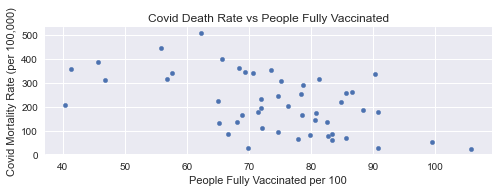

In [90]:
plt.figure(figsize=(8,8))
ax = plt.subplot(3,1,1)
covidhighincomerdd.plot.scatter(x='people_fully_vaccinated_per_hundred', y='covid_mortality_rate (per 100000)', ax=ax)
plt.xlabel('People Fully Vaccinated per 100')
plt.ylabel('Covid Mortality Rate (per 100,000)')

plt.title('Covid Death Rate vs People Fully Vaccinated');

In [91]:
covidhighincomerdd.rename({'covid_mortality_rate (per 100000)':'coviddeathrate'}, axis = 'columns', inplace = True)

In [92]:
rdd_df = covidhighincomerdd.assign(threshold=(covidhighincomerdd['people_fully_vaccinated_per_hundred'] > 74.75).astype(int))

model = smf.wls('coviddeathrate~people_fully_vaccinated_per_hundred*threshold', rdd_df).fit()

model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [93]:
#covid death rate increases by 47.22(threshold) points with more people fully vaccinated
#people fully vaccinated increases the chance of death by 47%
#the p-value is not below 0.01, so it's not statistically significant
#and the right interpretation that would make total sense would be 47% decrease in death rate by people fully vaccinated per hundred above the threshold (74.75)

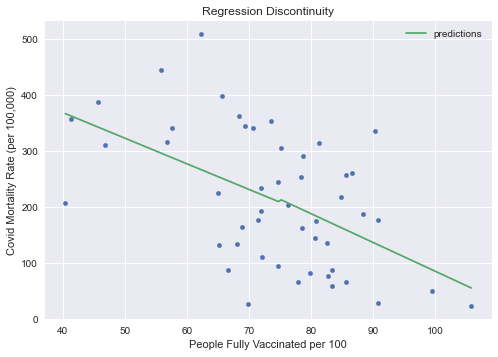

In [94]:
ax = covidhighincomerdd.plot.scatter(x='people_fully_vaccinated_per_hundred', y='coviddeathrate', color='C0')
covidhighincomerdd.assign(predictions=model.fittedvalues).plot(x='people_fully_vaccinated_per_hundred', y='predictions', ax=ax, color='C1')
plt.xlabel('People Fully Vaccinated per 100')
plt.ylabel('Covid Mortality Rate (per 100,000)')
plt.title('Regression Discontinuity');

In [95]:
#a slight discontinuity around the threshold is observed

In [96]:
#another way of doing it would be 

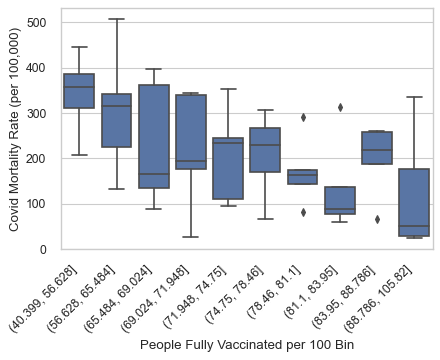

In [97]:
# Create binned peoplefullyvaccinated values
covidhighincomerdd['peoplefullyvaccinated_bin'] = pd.qcut(covidhighincomerdd['people_fully_vaccinated_per_hundred'],10)
covidhighincomerdd['peoplefullyvaccinated_bin'].value_counts()

covidhighincomerdd['over74'] = 0
covidhighincomerdd.loc[covidhighincomerdd['people_fully_vaccinated_per_hundred']>=74.75,'over74'] = 1 
covidhighincomerdd['over74'].value_counts()

# Plot
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')

sns.set(style='whitegrid')
a = sns.boxplot(x='peoplefullyvaccinated_bin', y='coviddeathrate',
              color='b',  data=covidhighincomerdd)
plt.xlabel('People Fully Vaccinated per 100 Bin')
plt.ylabel('Covid Mortality Rate (per 100,000)')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right');

In [98]:
re = smf.ols(formula = 'coviddeathrate ~ over74', data = covidhighincomerdd).fit()
print(re.summary())

                            OLS Regression Results                            
Dep. Variable:         coviddeathrate   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     8.088
Date:                Sun, 16 Apr 2023   Prob (F-statistic):            0.00658
Time:                        16:13:28   Log-Likelihood:                -300.34
No. Observations:                  49   AIC:                             604.7
Df Residuals:                      47   BIC:                             608.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    260.4445     23.157     11.247      0.0

In [99]:
#the p-value is actually significant, meaning the RDD is a good choice is this case

Text(0.5, 1.0, 'Regression Discontinuity: Before and After the Cutoff')

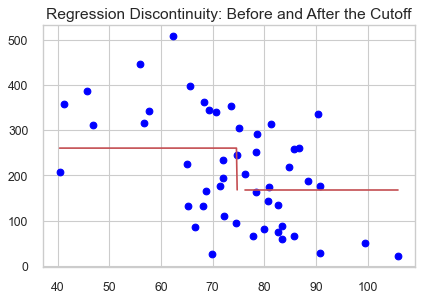

In [100]:
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(covidhighincomerdd['people_fully_vaccinated_per_hundred'],covidhighincomerdd['coviddeathrate'], color='blue')
l=covidhighincomerdd.loc[covidhighincomerdd['over74']==0,'over74'].count()
plt.plot(covidhighincomerdd['people_fully_vaccinated_per_hundred'][0:(l-1)], re.predict()[0:(l-1)], '-', color='r')
plt.plot(covidhighincomerdd['people_fully_vaccinated_per_hundred'][l:], re.predict()[l:], '-', color='r')
plt.title('Regression Discontinuity: Before and After the Cutoff', fontsize='14')

In [101]:
#a discontinuity is shown and it's statistically significant
#since it is significant, now it makes sense to say 
#there is a 47% decrease in death rate by people fully vaccinated per hundred 
#above the threshold of 74.75 fully vaccinated people per 100 individuals

## 7.6 Difference-in-Difference

The idea behind DiD is the following: 
The difference in the mean of the outcome between the two groups, treatment group and control group, in the "before" period (A) 
The difference in the mean of the outcome between the two groups, treatment group and control group, in the "after" period (B)
The "second difference", the difference between (A) and (B), which would be (C)
It measures how the change in outcome differs between the two groups, the average effect of treatment on the treated (ATT)
This difference is attributed to the causal effect of the intervention, difference-in-differences (DiD)

So, 
1. The difference in the mean of the outcome between the treatment group and control group
before the intervention (A)
2. The difference in the mean of the outcome between the treatment group and control group
after the intervention (B)
3. The difference between (A) and (B), which is the "second difference", DiD estimate

To do this there are some assumptions that need to be met when designing the treatment and control groups, they are:

1. Parallel trends: the treatment and control groups have parallel trends in the outcome. 
Meaning that in the absence of the intervention, the difference between the treatment and control group is constant over time. 
To see this, a good way is to plot and visually inspect if the parallel trends hold.
2. No spillover effects.
3. The characteristics of the treatment and control groups are stable over the study period.

In [102]:
covidvisual = pd.read_excel('covidvisualApril5th2023.xlsx')

In [103]:
covidvisual.shape

(149, 43)

In [104]:
covidvisual.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
0  Albania          ALB      41.0       20.0        67   
1  Algeria          DZA      28.0        3.0        91   
2   Angola          AGO     -12.5       18.5       148   

   Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                               0.796                   76.4626   
1                               0.745                   76.3767   
2                               0.586                   61.6434   

   Expected years of schooling  Mean years of schooling  \
0                    14.448000                11.286455   
1                    14.626896                 8.069284   
2                    12.172100                 5.417391   

   Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                            14131.110390    1.825579e+10   
1                            10800.225460    1.630444e+11   
2                             5465.617791    6.740429e+10   

   GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                6492.872012                    8.515501   
1                3690.627878                    3.500000   
2                1953.533757                    1.100000   

   Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                 2.041472                      12.683   
1                 7.226063                      11.747   
2                25.754266                      10.384   

                       Region          IncomeGroup  total_vaccinations  \
0       Europe & Central Asia  Upper middle income             3070468   
1  Middle East & North Africa  Lower middle income            15267442   
2          Sub-Saharan Africa  Lower middle income            24867841   

         date  people_vaccinated  people_fully_vaccinated  \
0  2023-03-19            1347054                  1276432   
1  2022-09-04            7840131                  6481186   
2  2023-03-26           15510800                  8631439   

   daily_vaccinations_raw  daily_vaccinations  total_vaccinations_per_hundred  \
0                 23655.0               17565                          108.03   
1                147230.0              256927                           34.00   
2                     NaN              183173                           69.88   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          47.39                                44.91   
1                          17.46                                14.43   
2                          43.58                                24.25   

   daily_vaccinations_per_million Country,Other TotalCases NewCases  \
0                            6180       Albania    334,663      NaN   
1                            5722       Algeria    271,599       +5   
2                            5147        Angola    105,316      NaN   

   TotalDeaths  NewDeaths TotalRecovered NewRecovered ActiveCases  \
0         3602        NaN        329,352          NaN       1,709   
1         6881        NaN        182,893          NaN      81,825   
2         1933        NaN        103,342          NaN          41   

  Serious,Critical TotalTests  Population Continent  New Cases/1M pop  \
0              NaN  1,941,032     2866374    Europe               NaN   
1              NaN    230,861    45350148    Africa               0.1   
2              NaN  1,499,795    35027343    Africa               NaN   

   New Deaths/1M pop Active Cases/1M pop  covid_mortality_rate (per 100000)  
0                NaN                 596                         125.663992  
1                NaN               1,804                          15.173049  
2                NaN                   1                           5.518546

to ilustrate a DiD, the best idea would be to have two different periods in time, for example when the vaccines started being 
applied. The period would be before the vaccines were applied and after, the treatment group the countries that received 
the vaccines and the control group the countries that did not receive vaccines. For a good counterfactual countries within 
the same income group could be chosen as treatment group (the ones that received that vaccines) and the control group 
the ones that did not receive the vaccines, in this case differences-in-differences-in-differences could be used, since 
the income groups would be interacted, or just differences-in-dinfferences with a dummy variable for income
but this is not the case, the data does not have two periods, so to apply the method I'll use 
the median date, how it is affecting the covid death rate

In [105]:
#there's the need to create the dummies and interaction

In [106]:
covidvisual.sort_values('date', ascending = False)

Country Country Code  Latitude  Longitude  HDI rank  \
66                   Israel          ISR   31.5000    34.7500        22   
20                 Bulgaria          BGR   43.0000    25.0000        68   
78                Lithuania          LTU   56.0000    24.0000        35   
143                 Uruguay          URY  -33.0000   -56.0000        58   
85                    Malta          MLT   35.8333    14.5833        23   
..                      ...          ...       ...        ...       ...   
130                Suriname          SUR    4.0000   -56.0000        99   
90                 Mongolia          MNG   46.0000   105.0000        96   
60                  Iceland          ISL   65.0000   -18.0000         3   
140                 Ukraine          UKR   49.0000    32.0000        77   
16   Bosnia and Herzegovina          BIH   44.0000    18.0000        74   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
66                                0.919                   82.2550   
20                                0.795                   71.7980   
78                                0.875                   73.7201   
143                               0.809                   75.4356   
85                                0.918                   83.7769   
..                                  ...                       ...   
130                               0.730                   70.2743   
90                                0.739                   70.9754   
60                                0.959                   82.6782   
140                               0.773                   71.6240   
16                                0.780                   75.3003   

     Expected years of schooling  Mean years of schooling  \
66                     16.050890                13.344866   
20                     13.897290                11.413180   
78                     16.285061                13.498100   
143                    16.832600                 8.982550   
85                     16.838570                12.210260   
..                           ...                      ...   
130                    13.035644                 9.776801   
90                     14.980350                 9.423700   
60                     19.163059                13.767170   
140                    14.956569                11.131420   
16                     13.800000                10.536320   

     Gross national income (GNI) per capita  GDP 2021 (US$)  \
66                              41523.74319    4.885265e+11   
20                              23078.95595    8.405631e+10   
78                              37931.30359    6.644526e+10   
143                             21268.88122    5.931948e+10   
85                              38884.45623    1.736404e+10   
..                                      ...             ...   
130                             12672.20033    2.984706e+09   
90                              10588.22532    1.528644e+10   
60                              55782.04981    2.560242e+10   
140                             13255.50977    2.000855e+11   
16                              15241.91465    2.336536e+10   

     GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
66                52170.711862                    8.611990   
20                12221.496606                    7.634610   
78                23723.340251                    5.981032   
143               17313.188348                    4.367009   
85                33486.671984                   10.297764   
..                         ...                         ...   
130                4869.134226                   -2.729619   
90                 4566.140154                    1.636770   
60                68727.636665                    4.403045   
140                4835.571777                    3.400000   
16                 7143.310548                    7.545591   

     Inflation Rate 2021 (%)  Unemployment Rate 2021 (%

In [107]:
covidvisual['date'].max()

'2023-04-04'

In [108]:
covidvisual['date'].min()

'2022-01-29'

In [109]:
covidvisual['date'].astype('datetime64[ns]').quantile(0.5, interpolation='midpoint')

Timestamp('2023-03-17 00:00:00')

In [110]:
covidvisual.dtypes

Country                                    object
Country Code                               object
Latitude                                  float64
Longitude                                 float64
HDI rank                                    int64
Human Development Index 2021 (HDI)        float64
Life expectancy at birth                  float64
Expected years of schooling               float64
Mean years of schooling                   float64
Gross national income (GNI) per capita    float64
GDP 2021 (US$)                            float64
GDP per capita 2021 (US$)                 float64
GDP growth 2021 (annual %)                float64
Inflation Rate 2021 (%)                   float64
Unemployment Rate 2021 (%)                float64
Region                                     object
IncomeGroup                                object
total_vaccinations                          int64
date                                       object
people_vaccinated                           int64


In [111]:
#covidvisual['date'] = pd.to_datetime(covidvisual['date']) it's better not to convert to timestamp

In [112]:
covidvisual['date'].describe()

count            149
unique            75
top       2023-03-26
freq              13
Name: date, dtype: object

In [113]:
#covidvisual['date'].median() #this works when converted to timestamp 
#the median Timestamp('2023-03-17 00:00:00') will change when the code is run again with the data updated

In [114]:
covidvisual['people_fully_vaccinated_per_hundred'].describe()

count    149.000000
mean      56.137584
std       24.003123
min        0.260000
25%       37.800000
50%       62.310000
75%       75.190000
max      105.820000
Name: people_fully_vaccinated_per_hundred, dtype: float64

In [115]:
covidvisual['date']

0      2023-03-19
1      2022-09-04
2      2023-03-26
3      2023-03-05
4      2023-02-02
          ...    
144    2023-03-05
145    2023-02-20
146    2023-03-09
147    2023-03-15
148    2022-10-09
Name: date, Length: 149, dtype: object

In [116]:
len(covidvisual[covidvisual['date'] < '2023-03-17'])

73

In [117]:
len(covidvisual[covidvisual['date'] > '2023-03-17'])

74

In [118]:
len(covidvisual[covidvisual['date'] == '2023-03-17'])

2

In [119]:
len(covidvisual[covidvisual['IncomeGroup']=='Low income'])

16

I'll choose two periods, before 2023-03-17 and after, for treatment and control 
in the low income group the treatment for the countries who received the vaccines (16 countries), and as control 
the countries who did not receive the vaccines

In [120]:
covidvisual['IncomeGroup']

0      Upper middle income
1      Lower middle income
2      Lower middle income
3      Upper middle income
4              High income
              ...         
144    Lower middle income
145    Lower middle income
146    Lower middle income
147             Low income
148    Lower middle income
Name: IncomeGroup, Length: 149, dtype: object

In [121]:
(covidvisual[covidvisual['IncomeGroup']=='Low income']).isna().sum()

Country                                    0
Country Code                               0
Latitude                                   0
Longitude                                  0
HDI rank                                   0
Human Development Index 2021 (HDI)         0
Life expectancy at birth                   0
Expected years of schooling                0
Mean years of schooling                    0
Gross national income (GNI) per capita     0
GDP 2021 (US$)                             0
GDP per capita 2021 (US$)                  0
GDP growth 2021 (annual %)                 0
Inflation Rate 2021 (%)                    0
Unemployment Rate 2021 (%)                 0
Region                                     0
IncomeGroup                                0
total_vaccinations                         0
date                                       0
people_vaccinated                          0
people_fully_vaccinated                    0
daily_vaccinations_raw                     3
daily_vacc

In [122]:
covidlowincome = covidvisual[covidvisual['IncomeGroup']=='Low income']

In [123]:
covidlowincome.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
21              Burkina Faso          BFA      13.0       -2.0       184   
22                   Burundi          BDI      -3.5       30.0       187   
27  Central African Republic          CAF       7.0       21.0       188   

    Human Development Index 2021 (HDI)  Life expectancy at birth  \
21                               0.449                   59.2696   
22                               0.426                   61.6627   
27                               0.404                   53.8947   

    Expected years of schooling  Mean years of schooling  \
21                     9.142100                 2.114962   
22                    10.722722                 3.129267   
27                     8.040172                 4.334000   

    Gross national income (GNI) per capita  GDP 2021 (US$)  \
21                             2117.915916    1.973762e+10   
22                              731.786709    2.779813e+09   
27                              966.058611    2.516498e+09   

    GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
21                 893.077156                    6.906342   
22                 221.477676                    1.795300   
27                 461.137490                    0.900000   

    Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)              Region  \
21                 3.653533                       5.232  Sub-Saharan Africa   
22                 8.404538                       1.132  Sub-Saharan Africa   
27                 4.259364                       6.458  Sub-Saharan Africa   

   IncomeGroup  total_vaccinations        date  people_vaccinated  \
21  Low income             6674010  2023-03-19            5152110   
22  Low income               35772  2023-03-19              33814   
27  Low income             2689234  2023-03-26            2381935   

    people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
21                  4129254                     NaN               39484   
22                    33225                   109.0                 410   
27                  2266531                 12887.0               25469   

    total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
21                           29.43                          22.72   
22                            0.28                           0.26   
27                           48.20                          42.69   

    people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
21                                18.21                            1741   
22                                 0.26                              32   
27                                40.63                            4565   

   Country,Other TotalCases NewCases  TotalDeaths  NewDeaths TotalRecovered  \
21  Burkina Faso     22,056      NaN          396        NaN         21,596   
22       Burundi     53,686      NaN           38        NaN         53,569   
27           CAF     15,368      NaN          113        NaN         15,200   

   NewRecovered ActiveCases Serious,Critical TotalTests  Population Continent  \
21          NaN          64              NaN    248,995    22102838    Africa   
22          NaN          79              NaN    345,742    12624840    Africa   
27          NaN          55                2     81,294     5016678    Africa   

    New Cases/1M pop  New Deaths/1M pop Active Cases/1M pop  \
21               NaN                NaN                   3   
22               NaN                NaN                   6   
27               NaN                NaN                  11   

    covid_mortality_rate (per 100000)  
21                           1.791625  
22                           0.300994  
27                           2.252487

In [124]:
covidlowincome['people_fully_vaccinated_per_hundred'].fillna(0).apply(np.ceil).astype(int)

21     19
22      1
27     41
43     31
47     20
53     35
54     18
81      9
84     15
93     57
99     21
115    72
121    49
129    29
139    28
147    44
Name: people_fully_vaccinated_per_hundred, dtype: int32

In [125]:
covidlowincome['people_fully_vaccinated_per_hundred']=covidlowincome['people_fully_vaccinated_per_hundred'].fillna(0).apply(np.ceil).astype(int)

<ipython-input-125-9074147ca381>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
covidlowincome['people_fully_vaccinated_per_hundred']

21     19
22      1
27     41
43     31
47     20
53     35
54     18
81      9
84     15
93     57
99     21
115    72
121    49
129    29
139    28
147    44
Name: people_fully_vaccinated_per_hundred, dtype: int32

In [127]:
covidlowincome.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
21              Burkina Faso          BFA      13.0       -2.0       184   
22                   Burundi          BDI      -3.5       30.0       187   
27  Central African Republic          CAF       7.0       21.0       188   

    Human Development Index 2021 (HDI)  Life expectancy at birth  \
21                               0.449                   59.2696   
22                               0.426                   61.6627   
27                               0.404                   53.8947   

    Expected years of schooling  Mean years of schooling  \
21                     9.142100                 2.114962   
22                    10.722722                 3.129267   
27                     8.040172                 4.334000   

    Gross national income (GNI) per capita  GDP 2021 (US$)  \
21                             2117.915916    1.973762e+10   
22                              731.786709    2.779813e+09   
27                              966.058611    2.516498e+09   

    GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
21                 893.077156                    6.906342   
22                 221.477676                    1.795300   
27                 461.137490                    0.900000   

    Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)              Region  \
21                 3.653533                       5.232  Sub-Saharan Africa   
22                 8.404538                       1.132  Sub-Saharan Africa   
27                 4.259364                       6.458  Sub-Saharan Africa   

   IncomeGroup  total_vaccinations        date  people_vaccinated  \
21  Low income             6674010  2023-03-19            5152110   
22  Low income               35772  2023-03-19              33814   
27  Low income             2689234  2023-03-26            2381935   

    people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
21                  4129254                     NaN               39484   
22                    33225                   109.0                 410   
27                  2266531                 12887.0               25469   

    total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
21                           29.43                          22.72   
22                            0.28                           0.26   
27                           48.20                          42.69   

    people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
21                                   19                            1741   
22                                    1                              32   
27                                   41                            4565   

   Country,Other TotalCases NewCases  TotalDeaths  NewDeaths TotalRecovered  \
21  Burkina Faso     22,056      NaN          396        NaN         21,596   
22       Burundi     53,686      NaN           38        NaN         53,569   
27           CAF     15,368      NaN          113        NaN         15,200   

   NewRecovered ActiveCases Serious,Critical TotalTests  Population Continent  \
21          NaN          64              NaN    248,995    22102838    Africa   
22          NaN          79              NaN    345,742    12624840    Africa   
27          NaN          55                2     81,294     5016678    Africa   

    New Cases/1M pop  New Deaths/1M pop Active Cases/1M pop  \
21               NaN                NaN                   3   
22               NaN                NaN                   6   
27               NaN                NaN                  11   

    covid_mortality_rate (per 100000)  
21                           1.791625  
22                           0.300994  
27                           2.252487

In [128]:
covidlowincome['Continent'].unique()

array(['Africa'], dtype=object)

In [129]:
covidvisualdummies = pd.get_dummies(covidlowincome, columns=['IncomeGroup', 'Continent']) #drop_first = True)

In [130]:
covidvisualdummies.shape

(16, 43)

In [131]:
covidvisualdummies.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
21              Burkina Faso          BFA      13.0       -2.0       184   
22                   Burundi          BDI      -3.5       30.0       187   
27  Central African Republic          CAF       7.0       21.0       188   

    Human Development Index 2021 (HDI)  Life expectancy at birth  \
21                               0.449                   59.2696   
22                               0.426                   61.6627   
27                               0.404                   53.8947   

    Expected years of schooling  Mean years of schooling  \
21                     9.142100                 2.114962   
22                    10.722722                 3.129267   
27                     8.040172                 4.334000   

    Gross national income (GNI) per capita  GDP 2021 (US$)  \
21                             2117.915916    1.973762e+10   
22                              731.786709    2.779813e+09   
27                              966.058611    2.516498e+09   

    GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
21                 893.077156                    6.906342   
22                 221.477676                    1.795300   
27                 461.137490                    0.900000   

    Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)              Region  \
21                 3.653533                       5.232  Sub-Saharan Africa   
22                 8.404538                       1.132  Sub-Saharan Africa   
27                 4.259364                       6.458  Sub-Saharan Africa   

    total_vaccinations        date  people_vaccinated  \
21             6674010  2023-03-19            5152110   
22               35772  2023-03-19              33814   
27             2689234  2023-03-26            2381935   

    people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
21                  4129254                     NaN               39484   
22                    33225                   109.0                 410   
27                  2266531                 12887.0               25469   

    total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
21                           29.43                          22.72   
22                            0.28                           0.26   
27                           48.20                          42.69   

    people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
21                                   19                            1741   
22                                    1                              32   
27                                   41                            4565   

   Country,Other TotalCases NewCases  TotalDeaths  NewDeaths TotalRecovered  \
21  Burkina Faso     22,056      NaN          396        NaN         21,596   
22       Burundi     53,686      NaN           38        NaN         53,569   
27           CAF     15,368      NaN          113        NaN         15,200   

   NewRecovered ActiveCases Serious,Critical TotalTests  Population  \
21          NaN          64              NaN    248,995    22102838   
22          NaN          79              NaN    345,742    12624840   
27          NaN          55                2     81,294     5016678   

    New Cases/1M pop  New Deaths/1M pop Active Cases/1M pop  \
21               NaN                NaN                   3   
22               NaN                NaN                   6   
27               NaN                NaN                  11   

    covid_mortality_rate (per 100000)  IncomeGroup_Low income  \
21                           1.791625                       1   
22                           0.300994                       1   
27                           2.252487                       1   

    Continent_Africa  
21                 1  
22                 1  
27                 1

In [132]:
covidvisualdummies.sort_values('date', ascending = False)

Country Country Code  Latitude  Longitude  HDI rank  \
129                     Sudan          SDN   15.0000    30.0000       172   
27   Central African Republic          CAF    7.0000    21.0000       188   
43                   Ethiopia          ETH    8.0000    38.0000       175   
54              Guinea-Bissau          GNB   12.0000   -15.0000       177   
81                 Madagascar          MDG  -20.0000    47.0000       173   
121              Sierra Leone          SLE    8.5000   -11.5000       181   
139                    Uganda          UGA    1.0000    32.0000       166   
21               Burkina Faso          BFA   13.0000    -2.0000       184   
22                    Burundi          BDI   -3.5000    30.0000       187   
47                     Gambia          GMB   13.4667   -16.5667       174   
53                     Guinea          GIN   11.0000   -10.0000       182   
84                       Mali          MLI   17.0000    -4.0000       186   
147                    Zambia          ZMB  -15.0000    30.0000       154   
99                      Niger          NER   16.0000     8.0000       189   
93                 Mozambique          MOZ  -18.2500    35.0000       185   
115                    Rwanda          RWA   -2.0000    30.0000       165   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
129                               0.508                   65.2667   
27                                0.404                   53.8947   
43                                0.498                   64.9748   
54                                0.483                   59.6523   
81                                0.501                   64.4853   
121                               0.477                   60.0624   
139                               0.525                   62.7048   
21                                0.449                   59.2696   
22                                0.426                   61.6627   
47                                0.500                   62.0830   
53                                0.465                   58.8922   
84                                0.428                   58.9414   
147                               0.565                   61.2234   
99                                0.400                   61.5763   
93                                0.446                   59.3247   
115                               0.534                   66.0722   

     Expected years of schooling  Mean years of schooling  \
129                     7.945188                 3.820000   
27                      8.040172                 4.334000   
43                      9.651071                 3.201521   
54                     10.613063                 3.583719   
81                     10.134991                 5.120469   
121                     9.573391                 4.576081   
139                    10.149870                 5.730942   
21                      9.142100                 2.114962   
22                     10.722722                 3.129267   
47                      9.418626                 4.637487   
53                      9.805297                 2.202126   
84                      7.423038                 2.310000   
147                    10.928760                 7.187091   
99                      6.957112                 2.116717   
93                     10.219152                 3.197642   
115                    11.230970                 4.425292   

     Gross national income (GNI) per capita  GDP 2021 (US$)  \
129                             3575.190840    3.432606e+10   
27                               966.058611    2.516498e+09   
43                              2361.069604    1.112711e+11   
54                              1908.241590    1.638518e+09   
81                              1483.520983    1.447260e+10   
121                             1621.512579    4.042238e+09   
139                             2181.436510    4.052979e+10

In [133]:
covidvisualdummies.dtypes

Country                                    object
Country Code                               object
Latitude                                  float64
Longitude                                 float64
HDI rank                                    int64
Human Development Index 2021 (HDI)        float64
Life expectancy at birth                  float64
Expected years of schooling               float64
Mean years of schooling                   float64
Gross national income (GNI) per capita    float64
GDP 2021 (US$)                            float64
GDP per capita 2021 (US$)                 float64
GDP growth 2021 (annual %)                float64
Inflation Rate 2021 (%)                   float64
Unemployment Rate 2021 (%)                float64
Region                                     object
total_vaccinations                          int64
date                                       object
people_vaccinated                           int64
people_fully_vaccinated                     int64


In [134]:
covidvisualdummies['date'] = covidvisualdummies['date'].str.replace('-','')

In [135]:
covidvisualdummies

Country Country Code  Latitude  Longitude  HDI rank  \
21               Burkina Faso          BFA   13.0000    -2.0000       184   
22                    Burundi          BDI   -3.5000    30.0000       187   
27   Central African Republic          CAF    7.0000    21.0000       188   
43                   Ethiopia          ETH    8.0000    38.0000       175   
47                     Gambia          GMB   13.4667   -16.5667       174   
53                     Guinea          GIN   11.0000   -10.0000       182   
54              Guinea-Bissau          GNB   12.0000   -15.0000       177   
81                 Madagascar          MDG  -20.0000    47.0000       173   
84                       Mali          MLI   17.0000    -4.0000       186   
93                 Mozambique          MOZ  -18.2500    35.0000       185   
99                      Niger          NER   16.0000     8.0000       189   
115                    Rwanda          RWA   -2.0000    30.0000       165   
121              Sierra Leone          SLE    8.5000   -11.5000       181   
129                     Sudan          SDN   15.0000    30.0000       172   
139                    Uganda          UGA    1.0000    32.0000       166   
147                    Zambia          ZMB  -15.0000    30.0000       154   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
21                                0.449                   59.2696   
22                                0.426                   61.6627   
27                                0.404                   53.8947   
43                                0.498                   64.9748   
47                                0.500                   62.0830   
53                                0.465                   58.8922   
54                                0.483                   59.6523   
81                                0.501                   64.4853   
84                                0.428                   58.9414   
93                                0.446                   59.3247   
99                                0.400                   61.5763   
115                               0.534                   66.0722   
121                               0.477                   60.0624   
129                               0.508                   65.2667   
139                               0.525                   62.7048   
147                               0.565                   61.2234   

     Expected years of schooling  Mean years of schooling  \
21                      9.142100                 2.114962   
22                     10.722722                 3.129267   
27                      8.040172                 4.334000   
43                      9.651071                 3.201521   
47                      9.418626                 4.637487   
53                      9.805297                 2.202126   
54                     10.613063                 3.583719   
81                     10.134991                 5.120469   
84                      7.423038                 2.310000   
93                     10.219152                 3.197642   
99                      6.957112                 2.116717   
115                    11.230970                 4.425292   
121                     9.573391                 4.576081   
129                     7.945188                 3.820000   
139                    10.149870                 5.730942   
147                    10.928760                 7.187091   

     Gross national income (GNI) per capita  GDP 2021 (US$)  \
21                              2117.915916    1.973762e+10   
22                               731.786709    2.779813e+09   
27                               966.058611    2.516498e+09   
43                              2361.069604    1.112711e+11   
47                              2172.207664    2.038417e+09   
53                              2480.887182    1.609182e+10   
54                              1908.241590    1.638518e+09

In [136]:
covidvisualdummies.sort_values(by = 'date', ascending = False, inplace = True)

In [137]:
covidvisualdummies

Country Country Code  Latitude  Longitude  HDI rank  \
129                     Sudan          SDN   15.0000    30.0000       172   
27   Central African Republic          CAF    7.0000    21.0000       188   
43                   Ethiopia          ETH    8.0000    38.0000       175   
54              Guinea-Bissau          GNB   12.0000   -15.0000       177   
81                 Madagascar          MDG  -20.0000    47.0000       173   
121              Sierra Leone          SLE    8.5000   -11.5000       181   
139                    Uganda          UGA    1.0000    32.0000       166   
21               Burkina Faso          BFA   13.0000    -2.0000       184   
22                    Burundi          BDI   -3.5000    30.0000       187   
47                     Gambia          GMB   13.4667   -16.5667       174   
53                     Guinea          GIN   11.0000   -10.0000       182   
84                       Mali          MLI   17.0000    -4.0000       186   
147                    Zambia          ZMB  -15.0000    30.0000       154   
99                      Niger          NER   16.0000     8.0000       189   
93                 Mozambique          MOZ  -18.2500    35.0000       185   
115                    Rwanda          RWA   -2.0000    30.0000       165   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
129                               0.508                   65.2667   
27                                0.404                   53.8947   
43                                0.498                   64.9748   
54                                0.483                   59.6523   
81                                0.501                   64.4853   
121                               0.477                   60.0624   
139                               0.525                   62.7048   
21                                0.449                   59.2696   
22                                0.426                   61.6627   
47                                0.500                   62.0830   
53                                0.465                   58.8922   
84                                0.428                   58.9414   
147                               0.565                   61.2234   
99                                0.400                   61.5763   
93                                0.446                   59.3247   
115                               0.534                   66.0722   

     Expected years of schooling  Mean years of schooling  \
129                     7.945188                 3.820000   
27                      8.040172                 4.334000   
43                      9.651071                 3.201521   
54                     10.613063                 3.583719   
81                     10.134991                 5.120469   
121                     9.573391                 4.576081   
139                    10.149870                 5.730942   
21                      9.142100                 2.114962   
22                     10.722722                 3.129267   
47                      9.418626                 4.637487   
53                      9.805297                 2.202126   
84                      7.423038                 2.310000   
147                    10.928760                 7.187091   
99                      6.957112                 2.116717   
93                     10.219152                 3.197642   
115                    11.230970                 4.425292   

     Gross national income (GNI) per capita  GDP 2021 (US$)  \
129                             3575.190840    3.432606e+10   
27                               966.058611    2.516498e+09   
43                              2361.069604    1.112711e+11   
54                              1908.241590    1.638518e+09   
81                              1483.520983    1.447260e+10   
121                             1621.512579    4.042238e+09   
139                             2181.436510    4.052979e+10

In [138]:
len(covidvisualdummies['date'])//2

8

In [139]:
covidvisualdummies['date'].iloc[8]

'20230319'

In [140]:
covidvisualdummies['date'] = covidvisualdummies['date'].astype(int)

In [141]:
covidvisualdummies[covidvisualdummies['date'] < 20230319] 

Country Country Code  Latitude  Longitude  HDI rank  \
147      Zambia          ZMB    -15.00       30.0       154   
99        Niger          NER     16.00        8.0       189   
93   Mozambique          MOZ    -18.25       35.0       185   
115      Rwanda          RWA     -2.00       30.0       165   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
147                               0.565                   61.2234   
99                                0.400                   61.5763   
93                                0.446                   59.3247   
115                               0.534                   66.0722   

     Expected years of schooling  Mean years of schooling  \
147                    10.928760                 7.187091   
99                      6.957112                 2.116717   
93                     10.219152                 3.197642   
115                    11.230970                 4.425292   

     Gross national income (GNI) per capita  GDP 2021 (US$)  \
147                             3217.767739    2.214763e+10   
99                              1239.866936    1.491500e+10   
93                              1198.073924    1.577676e+10   
115                             2209.795202    1.107036e+10   

     GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
147                1137.343633                    4.598734   
99                  590.629455                    1.387129   
93                  491.839113                    2.363988   
115                 822.347989                   10.884519   

     Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)              Region  \
147                22.021234                       6.220  Sub-Saharan Africa   
99                  3.837868                       0.668  Sub-Saharan Africa   
93                  5.688487                       3.939  Sub-Saharan Africa   
115                -0.391347                      13.315  Sub-Saharan Africa   

     total_vaccinations      date  people_vaccinated  people_fully_vaccinated  \
147            12792112  20230315           11158619                  8747040   
99              7339299  20230312            6217508                  5454196   
93             29457535  20230129           18641485                 18466955   
115            26106436  20230101           10572981                  9897876   

     daily_vaccinations_raw  daily_vaccinations  \
147                224617.0              180289   
99                      NaN              178386   
93                 295812.0              588728   
115                211071.0              370105   

     total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
147                           63.90                          55.74   
99                            28.00                          23.72   
93                            89.35                          56.54   
115                          189.50                          76.75   

     people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
147                                   44                            9006   
99                                    21                            6807   
93                                    57                           17857   
115                                   72                           26865   

    Country,Other TotalCases NewCases  TotalDeaths  NewDeaths TotalRecovered  \
147        Zambia    343,687      NaN         4058        NaN        339,507   
99          Niger      9,931      NaN          312        NaN          8,890   
93     Mozambique    233,334      NaN         2242        NaN        228,805   
115        Rwanda    133,194      NaN         1468        NaN        131,647   

    NewRecovered ActiveCases Serious,Critical TotalTests  Population  \
147          NaN         122              NaN  3,994,061    19470234   
99           NaN         729                1    254,538    26083660   
9

In [142]:
covidvisualdummies.loc[covidvisualdummies['date'] < 20230319, 'date'] = 0
covidvisualdummies.loc[covidvisualdummies['date'] >= 20230319, 'date'] = 1 

In [143]:
covidvisualdummies

Country Country Code  Latitude  Longitude  HDI rank  \
129                     Sudan          SDN   15.0000    30.0000       172   
27   Central African Republic          CAF    7.0000    21.0000       188   
43                   Ethiopia          ETH    8.0000    38.0000       175   
54              Guinea-Bissau          GNB   12.0000   -15.0000       177   
81                 Madagascar          MDG  -20.0000    47.0000       173   
121              Sierra Leone          SLE    8.5000   -11.5000       181   
139                    Uganda          UGA    1.0000    32.0000       166   
21               Burkina Faso          BFA   13.0000    -2.0000       184   
22                    Burundi          BDI   -3.5000    30.0000       187   
47                     Gambia          GMB   13.4667   -16.5667       174   
53                     Guinea          GIN   11.0000   -10.0000       182   
84                       Mali          MLI   17.0000    -4.0000       186   
147                    Zambia          ZMB  -15.0000    30.0000       154   
99                      Niger          NER   16.0000     8.0000       189   
93                 Mozambique          MOZ  -18.2500    35.0000       185   
115                    Rwanda          RWA   -2.0000    30.0000       165   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
129                               0.508                   65.2667   
27                                0.404                   53.8947   
43                                0.498                   64.9748   
54                                0.483                   59.6523   
81                                0.501                   64.4853   
121                               0.477                   60.0624   
139                               0.525                   62.7048   
21                                0.449                   59.2696   
22                                0.426                   61.6627   
47                                0.500                   62.0830   
53                                0.465                   58.8922   
84                                0.428                   58.9414   
147                               0.565                   61.2234   
99                                0.400                   61.5763   
93                                0.446                   59.3247   
115                               0.534                   66.0722   

     Expected years of schooling  Mean years of schooling  \
129                     7.945188                 3.820000   
27                      8.040172                 4.334000   
43                      9.651071                 3.201521   
54                     10.613063                 3.583719   
81                     10.134991                 5.120469   
121                     9.573391                 4.576081   
139                    10.149870                 5.730942   
21                      9.142100                 2.114962   
22                     10.722722                 3.129267   
47                      9.418626                 4.637487   
53                      9.805297                 2.202126   
84                      7.423038                 2.310000   
147                    10.928760                 7.187091   
99                      6.957112                 2.116717   
93                     10.219152                 3.197642   
115                    11.230970                 4.425292   

     Gross national income (GNI) per capita  GDP 2021 (US$)  \
129                             3575.190840    3.432606e+10   
27                               966.058611    2.516498e+09   
43                              2361.069604    1.112711e+11   
54                              1908.241590    1.638518e+09   
81                              1483.520983    1.447260e+10   
121                             1621.512579    4.042238e+09   
139                             2181.436510    4.052979e+10

In [144]:
#now there's a need for an interaction term

In [145]:
covidvisualdummies['people_fully_vaccinated_per_hundred']

129    29
27     41
43     31
54     18
81      9
121    49
139    28
21     19
22      1
47     20
53     35
84     15
147    44
99     21
93     57
115    72
Name: people_fully_vaccinated_per_hundred, dtype: int32

In [146]:
covidvisualdummies['date']

129    1
27     1
43     1
54     1
81     1
121    1
139    1
21     1
22     1
47     1
53     1
84     1
147    0
99     0
93     0
115    0
Name: date, dtype: int32

In [147]:
covidvisualdummies['date*people_fully_vaccinated_per_hundred']=covidvisualdummies['date']*covidvisualdummies['people_fully_vaccinated_per_hundred']

In [148]:
covidvisualdummies.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
129                     Sudan          SDN      15.0       30.0       172   
27   Central African Republic          CAF       7.0       21.0       188   
43                   Ethiopia          ETH       8.0       38.0       175   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
129                               0.508                   65.2667   
27                                0.404                   53.8947   
43                                0.498                   64.9748   

     Expected years of schooling  Mean years of schooling  \
129                     7.945188                 3.820000   
27                      8.040172                 4.334000   
43                      9.651071                 3.201521   

     Gross national income (GNI) per capita  GDP 2021 (US$)  \
129                             3575.190840    3.432606e+10   
27                               966.058611    2.516498e+09   
43                              2361.069604    1.112711e+11   

     GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
129                 751.821350                   -1.868520   
27                  461.137490                    0.900000   
43                  925.077428                    5.637303   

     Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)              Region  \
129               382.815998                   19.049999  Sub-Saharan Africa   
27                  4.259364                    6.458000  Sub-Saharan Africa   
43                 26.839522                    3.930000  Sub-Saharan Africa   

     total_vaccinations  date  people_vaccinated  people_fully_vaccinated  \
129            22598737     1           15207452                 13416394   
27              2689234     1            2381935                  2266531   
43             53805400     1           43896866                 37465340   

     daily_vaccinations_raw  daily_vaccinations  \
129                 20715.0              159116   
27                  12887.0               25469   
43                1866822.0             2808915   

     total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
129                           48.21                          32.44   
27                            48.20                          42.69   
43                            43.61                          35.58   

     people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
129                                   29                            3395   
27                                    41                            4565   
43                                    31                           22766   

    Country,Other TotalCases NewCases  TotalDeaths  NewDeaths TotalRecovered  \
129         Sudan     63,922      NaN         5034        NaN         58,603   
27            CAF     15,368      NaN          113        NaN         15,200   
43       Ethiopia    500,659      +21         7573        NaN        487,690   

    NewRecovered ActiveCases Serious,Critical TotalTests  Population  \
129          NaN         285              NaN    562,941    45992020   
27           NaN          55                2     81,294     5016678   
43            +7       5,396                1  5,523,562   120812698   

     New Cases/1M pop  New Deaths/1M pop Active Cases/1M pop  \
129               NaN                NaN                   6   
27                NaN                NaN                  11   
43                0.2                NaN                  45   

     covid_mortality_rate (per 100000)  IncomeGroup_Low income  \
129                          10.945377                       1   
27                            2.252487                       1   
43                            6.268381                       1   

     Continent_Africa  date*people_fully_vaccinated_per_hundred  
129                 1                                        29  
27  

In [149]:
covidvisualdummies.rename({'covid_mortality_rate (per 100000)':'coviddeathrate', 'IncomeGroup_Low income':'lowincomegroup'}, axis = 'columns', inplace = True)

In [150]:
#covidvisualdummies.rename({'Continent_North America':'continent_northamerica'}, axis = 'columns', inplace = True)

In [151]:
model = smf.ols(formula = 'coviddeathrate ~ date*people_fully_vaccinated_per_hundred + Continent_Africa \
                + lowincomegroup', data = covidvisualdummies).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         coviddeathrate   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.8800
Date:                Sun, 16 Apr 2023   Prob (F-statistic):              0.479
Time:                        16:13:29   Log-Likelihood:                -48.102
No. Observations:                  16   AIC:                             104.2
Df Residuals:                      12   BIC:                             107.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



The 'date:people_fully_vaccinated_per_hundred' is not statistically significant, meaning that vaccines after the date meantioned has no impact on coviddeathrate, as compared with the date before.

In [152]:
# People Fully Vaccinated in the low income group Before and after the middle date
peoplefullyvaccinated_before = covidvisualdummies.loc[(covidvisualdummies['people_fully_vaccinated_per_hundred']==1) & (covidvisualdummies['date']!=1),'coviddeathrate'].mean()
peoplefullyvaccinated_after  = covidvisualdummies.loc[(covidvisualdummies['people_fully_vaccinated_per_hundred']==1) & (covidvisualdummies['date']==1),'coviddeathrate'].mean()

# People Not Fully Vaccinated in the low income group Before and after the middle date
peoplenotfullyvaccinated_before = covidvisualdummies.loc[(covidvisualdummies['people_fully_vaccinated_per_hundred']!=1) & (covidvisualdummies['date']!=1),'coviddeathrate'].mean()
peoplenotfullyvaccinated_after  = covidvisualdummies.loc[(covidvisualdummies['people_fully_vaccinated_per_hundred']!=1) & (covidvisualdummies['date']==1),'coviddeathrate'].mean()

# People Fully Vaccinated in the low income group Before and after the middle date counterfactual (if no treatment)
peoplefullyvaccinated_counterfactual = peoplefullyvaccinated_before + ( peoplefullyvaccinated_before - peoplenotfullyvaccinated_before )

[peoplefullyvaccinated_before, peoplefullyvaccinated_after,
 peoplenotfullyvaccinated_before,peoplenotfullyvaccinated_after,peoplefullyvaccinated_before,peoplefullyvaccinated_counterfactual]

#it'll present the covid death rate of peoplefullyvaccinated (before and after), peoplenotfullyvaccinated(before and after) and peoplefullyvaccinated counterfactual

[nan, 0.3009939135862316, 9.901885701099854, 5.913430381508476, nan, nan]

<Figure size 320x240 with 0 Axes>

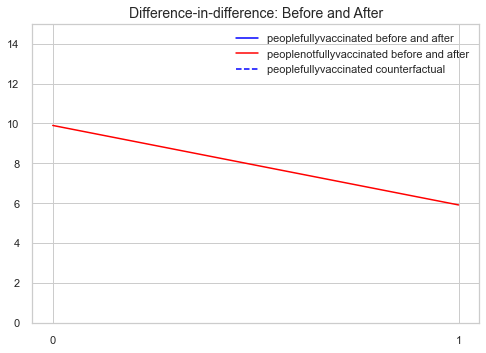

In [153]:
plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
linepeoplefullyvaccinated, = ax.plot(['0', '1'], [peoplefullyvaccinated_before, peoplefullyvaccinated_after],color='blue',label='peoplefullyvaccinated before and after')
linepeoplenotfullyvaccinated, = ax.plot(['0', '1'], [peoplenotfullyvaccinated_before, peoplenotfullyvaccinated_after],color = 'red',label = 'peoplenotfullyvaccinated before and after')
linepeoplefullyvaccinated0, = ax.plot(['0', '1'], [peoplefullyvaccinated_before, peoplefullyvaccinated_counterfactual],color = 'blue',linestyle='dashed',label='peoplefullyvaccinated counterfactual')
ax.legend()
plt.ylim(0, 15)  
plt.title("Difference-in-difference: Before and After", fontsize="14");

In [154]:
#the blue line and dotted lines are not showned because of the dates chosen, it had some NaN values when making the counterfactural
#with other dates it will show

### 7.7 More OLS

In [155]:
covidvisual = pd.read_excel('covidvisualApril5th2023.xlsx')

In [156]:
covidvisual

Country Country Code  Latitude  Longitude  HDI rank  \
0       Albania          ALB      41.0       20.0        67   
1       Algeria          DZA      28.0        3.0        91   
2        Angola          AGO     -12.5       18.5       148   
3       Armenia          ARM      40.0       45.0        85   
4     Australia          AUS     -27.0      133.0         5   
..          ...          ...       ...        ...       ...   
144  Uzbekistan          UZB      41.0       64.0       101   
145     Vanuatu          VUT     -16.0      167.0       140   
146    Viet Nam          VNM      16.0      106.0       115   
147      Zambia          ZMB     -15.0       30.0       154   
148    Zimbabwe          ZWE     -20.0       30.0       146   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                                 0.796                   76.4626   
1                                 0.745                   76.3767   
2                                 0.586                   61.6434   
3                                 0.759                   72.0431   
4                                 0.951                   84.5265   
..                                  ...                       ...   
144                               0.727                   70.8616   
145                               0.607                   70.4490   
146                               0.703                   73.6181   
147                               0.565                   61.2234   
148                               0.593                   59.2531   

     Expected years of schooling  Mean years of schooling  \
0                      14.448000                11.286455   
1                      14.626896                 8.069284   
2                      12.172100                 5.417391   
3                      13.116760                11.330300   
4                      21.054590                12.726820   
..                           ...                      ...   
144                    12.477140                11.895590   
145                    11.535315                 7.064846   
146                    12.951932                 8.370280   
147                    10.928760                 7.187091   
148                    12.110969                 8.710909   

     Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                              14131.110390    1.825579e+10   
1                              10800.225460    1.630444e+11   
2                               5465.617791    6.740429e+10   
3                              13157.993900    1.386141e+10   
4                              49238.433350    1.552667e+12   
..                                      ...             ...   
144                             7916.785725    6.923890e+10   
145                             3085.411633    9.563327e+08   
146                             7867.371345    3.661376e+11   
147                             3217.767739    2.214763e+10   
148                             3809.887158    2.837124e+10   

     GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                  6492.872012                    8.515501   
1                  3690.627878                    3.500000   
2                  1953.533757                    1.100000   
3                  4966.513471                    5.700000   
4                 60443.109165                    2.236212   
..                         ...                         ...   
144                1983.064723                    7.420110   
145                2996.621062                    0.449256   
146                3756.489121                    2.561551   
147                1137.343633                    4.598734   
148                1773.920411                    8.468017   

     Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                   2.041472                      12.683   
1                   7.226063                      11.747   
2      

In [157]:
covidvisual.shape

(149, 43)

In [158]:
covidvisual.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
0  Albania          ALB      41.0       20.0        67   
1  Algeria          DZA      28.0        3.0        91   
2   Angola          AGO     -12.5       18.5       148   

   Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                               0.796                   76.4626   
1                               0.745                   76.3767   
2                               0.586                   61.6434   

   Expected years of schooling  Mean years of schooling  \
0                    14.448000                11.286455   
1                    14.626896                 8.069284   
2                    12.172100                 5.417391   

   Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                            14131.110390    1.825579e+10   
1                            10800.225460    1.630444e+11   
2                             5465.617791    6.740429e+10   

   GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                6492.872012                    8.515501   
1                3690.627878                    3.500000   
2                1953.533757                    1.100000   

   Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                 2.041472                      12.683   
1                 7.226063                      11.747   
2                25.754266                      10.384   

                       Region          IncomeGroup  total_vaccinations  \
0       Europe & Central Asia  Upper middle income             3070468   
1  Middle East & North Africa  Lower middle income            15267442   
2          Sub-Saharan Africa  Lower middle income            24867841   

         date  people_vaccinated  people_fully_vaccinated  \
0  2023-03-19            1347054                  1276432   
1  2022-09-04            7840131                  6481186   
2  2023-03-26           15510800                  8631439   

   daily_vaccinations_raw  daily_vaccinations  total_vaccinations_per_hundred  \
0                 23655.0               17565                          108.03   
1                147230.0              256927                           34.00   
2                     NaN              183173                           69.88   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          47.39                                44.91   
1                          17.46                                14.43   
2                          43.58                                24.25   

   daily_vaccinations_per_million Country,Other TotalCases NewCases  \
0                            6180       Albania    334,663      NaN   
1                            5722       Algeria    271,599       +5   
2                            5147        Angola    105,316      NaN   

   TotalDeaths  NewDeaths TotalRecovered NewRecovered ActiveCases  \
0         3602        NaN        329,352          NaN       1,709   
1         6881        NaN        182,893          NaN      81,825   
2         1933        NaN        103,342          NaN          41   

  Serious,Critical TotalTests  Population Continent  New Cases/1M pop  \
0              NaN  1,941,032     2866374    Europe               NaN   
1              NaN    230,861    45350148    Africa               0.1   
2              NaN  1,499,795    35027343    Africa               NaN   

   New Deaths/1M pop Active Cases/1M pop  covid_mortality_rate (per 100000)  
0                NaN                 596                         125.663992  
1                NaN               1,804                          15.173049  
2                NaN                   1                           5.518546

In [159]:
covidvisual.columns

Index(['Country', 'Country Code', 'Latitude', 'Longitude', 'HDI rank',
       'Human Development Index 2021 (HDI)', 'Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'Gross national income (GNI) per capita', 'GDP 2021 (US$)',
       'GDP per capita 2021 (US$)', 'GDP growth 2021 (annual %)',
       'Inflation Rate 2021 (%)', 'Unemployment Rate 2021 (%)', 'Region',
       'IncomeGroup', 'total_vaccinations', 'date', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations_raw',
       'daily_vaccinations', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million', 'Country,Other', 'TotalCases',
       'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
       'NewRecovered', 'ActiveCases', 'Serious,Critical', 'TotalTests',
       'Population', 'Continent', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M p

In [160]:
X = covidvisual[['people_fully_vaccinated_per_hundred', 'Human Development Index 2021 (HDI)', 'Unemployment Rate 2021 (%)', 'Inflation Rate 2021 (%)', 'GDP per capita 2021 (US$)', 'GDP 2021 (US$)', 'HDI rank']]
y = covidvisual['covid_mortality_rate (per 100000)']
X = sm.add_constant(X)

In [161]:
model = sm.OLS(y, X, missing='drop')
results = model.fit()
predictions = results.predict(X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     covid_mortality_rate (per 100000)   R-squared:                       0.452
Model:                                           OLS   Adj. R-squared:                  0.425
Method:                                Least Squares   F-statistic:                     16.64
Date:                               Sun, 16 Apr 2023   Prob (F-statistic):           6.96e-16
Time:                                       16:13:30   Log-Likelihood:                -902.79
No. Observations:                                149   AIC:                             1822.
Df Residuals:                                    141   BIC:                             1846.
Df Model:                                          7                                         
Covariance Type:                           nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                1029.1086    517.958      1.987      0.049       5.141    2053.076
people_fully_vaccinated_per_hundred    -1.3522      0.500     -2.704      0.008      -2.341      -0.363
Human Development Index 2021 (HDI)   -576.9525    534.415     -1.080      0.282   -1633.455     479.550
Unemployment Rate 2021 (%)              3.5155      1.818      1.933      0.055      -0.079       7.110
Inflation Rate 2021 (%)                -0.0908      0.262     -0.347      0.729      -0.608       0.426
GDP per capita 2021 (US$)              -0.0026      0.001     -4.380      0.000      -0.004      -0.001
GDP 2021 (US$)                       1.712e-12   3.66e-12      0.468      0.641   -5.53e-12    8.95e-12
HDI rank                               -4.1253      1.465     -2.816      0.006      -7.021      -1.230
==============================================================================
Omnibus:                       42.969   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.057
Skew:                           1.120   Prob(JB):                     5.16e-27
Kurtosis:                       6.806   Cond. No.                     2.17e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
covidvisual.isnull().sum()

Country                                     0
Country Code                                0
Latitude                                    0
Longitude                                   0
HDI rank                                    0
Human Development Index 2021 (HDI)          0
Life expectancy at birth                    0
Expected years of schooling                 0
Mean years of schooling                     0
Gross national income (GNI) per capita      0
GDP 2021 (US$)                              0
GDP per capita 2021 (US$)                   0
GDP growth 2021 (annual %)                  0
Inflation Rate 2021 (%)                     0
Unemployment Rate 2021 (%)                  0
Region                                      0
IncomeGroup                                 0
total_vaccinations                          0
date                                        0
people_vaccinated                           0
people_fully_vaccinated                     0
daily_vaccinations_raw            

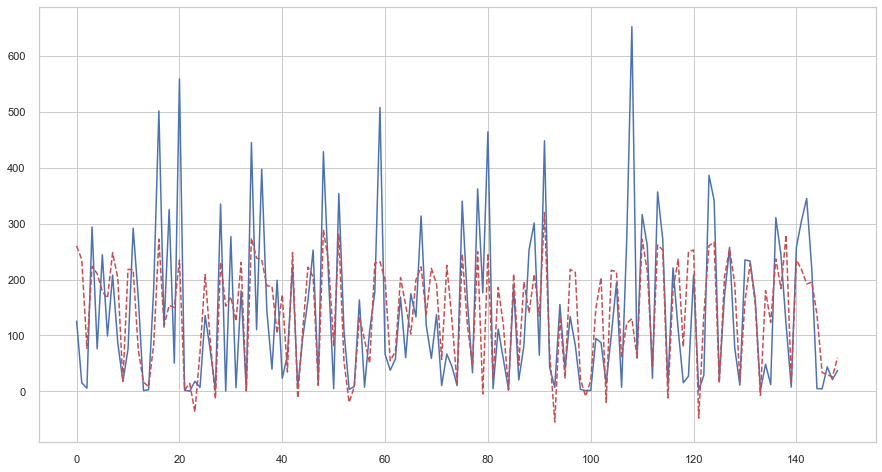

In [163]:
fig = plt.figure(figsize=(15,8))
plt.plot(range(0,len(y)), y.tolist(), 'b')
plt.plot(range(0,len(y)), predictions.tolist(), 'r--')
plt.show()

In [164]:
covidvisual = pd.read_excel('covidvisualApril5th2023.xlsx')

In [165]:
covidvisual.head(2)

Country Country Code  Latitude  Longitude  HDI rank  \
0  Albania          ALB      41.0       20.0        67   
1  Algeria          DZA      28.0        3.0        91   

   Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                               0.796                   76.4626   
1                               0.745                   76.3767   

   Expected years of schooling  Mean years of schooling  \
0                    14.448000                11.286455   
1                    14.626896                 8.069284   

   Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                             14131.11039    1.825579e+10   
1                             10800.22546    1.630444e+11   

   GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                6492.872012                    8.515501   
1                3690.627878                    3.500000   

   Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                 2.041472                      12.683   
1                 7.226063                      11.747   

                       Region          IncomeGroup  total_vaccinations  \
0       Europe & Central Asia  Upper middle income             3070468   
1  Middle East & North Africa  Lower middle income            15267442   

         date  people_vaccinated  people_fully_vaccinated  \
0  2023-03-19            1347054                  1276432   
1  2022-09-04            7840131                  6481186   

   daily_vaccinations_raw  daily_vaccinations  total_vaccinations_per_hundred  \
0                 23655.0               17565                          108.03   
1                147230.0              256927                           34.00   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          47.39                                44.91   
1                          17.46                                14.43   

   daily_vaccinations_per_million Country,Other TotalCases NewCases  \
0                            6180       Albania    334,663      NaN   
1                            5722       Algeria    271,599       +5   

   TotalDeaths  NewDeaths TotalRecovered NewRecovered ActiveCases  \
0         3602        NaN        329,352          NaN       1,709   
1         6881        NaN        182,893          NaN      81,825   

  Serious,Critical TotalTests  Population Continent  New Cases/1M pop  \
0              NaN  1,941,032     2866374    Europe               NaN   
1              NaN    230,861    45350148    Africa               0.1   

   New Deaths/1M pop Active Cases/1M pop  covid_mortality_rate (per 100000)  
0                NaN                 596                         125.663992  
1                NaN               1,804                          15.173049

In [166]:
covidvisuallm = covidvisual.loc[:, ['people_fully_vaccinated_per_hundred','covid_mortality_rate (per 100000)']]

In [167]:
covidvisuallm

people_fully_vaccinated_per_hundred  covid_mortality_rate (per 100000)
0                                  44.91                         125.663992
1                                  14.43                          15.173049
2                                  24.25                           5.518546
3                                  35.49                         294.047778
4                                  82.72                          76.167703
..                                   ...                                ...
144                                52.40                           4.761201
145                                49.66                           4.350096
146                                87.59                          43.642703
147                                43.70                          20.842071
148                                29.11                          37.041559

[149 rows x 2 columns]

In [168]:
covidvisuallm = covidvisuallm.dropna(subset=['people_fully_vaccinated_per_hundred','covid_mortality_rate (per 100000)'])

In [169]:
covidvisuallm

people_fully_vaccinated_per_hundred  covid_mortality_rate (per 100000)
0                                  44.91                         125.663992
1                                  14.43                          15.173049
2                                  24.25                           5.518546
3                                  35.49                         294.047778
4                                  82.72                          76.167703
..                                   ...                                ...
144                                52.40                           4.761201
145                                49.66                           4.350096
146                                87.59                          43.642703
147                                43.70                          20.842071
148                                29.11                          37.041559

[149 rows x 2 columns]

In [170]:
X = covidvisuallm['people_fully_vaccinated_per_hundred']
y = covidvisuallm['covid_mortality_rate (per 100000)']

In [171]:
lm = linear_model.LinearRegression()
model = lm.fit(X.values.reshape(-1,1),y)

In [172]:
lm.coef_

array([0.97291559])

In [173]:
lm.intercept_

86.03453683717042

In [174]:
lm.score(X.values.reshape(-1,1),y)

0.02766353880756789

In [175]:
predictions = lm.predict(X.values.reshape(-1,1))
print(predictions[0:5])

[129.72817578 100.07370873 109.62773978 120.56331096 166.51411406]


#### 7.7.1 Robust Linear Regression

In [176]:
X = covidvisuallm['people_fully_vaccinated_per_hundred']
y = covidvisuallm['covid_mortality_rate (per 100000)']

In [177]:
model = sm.RLM(y, X, missing='drop', M=sm.robust.norms.HuberT())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Robust linear Model Regression Results                           
=============================================================================================
Dep. Variable:     covid_mortality_rate (per 100000)   No. Observations:                  149
Model:                                           RLM   Df Residuals:                      148
Method:                                         IRLS   Df Model:                            0
Norm:                                         HuberT                                         
Scale Est.:                                      mad                                         
Cov Type:                                         H1                                         
Date:                               Sun, 16 Apr 2023                                         
Time:                                       16:13:31                                         
No. Iterations:                                   13                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
people_fully_vaccinated_per_hundred     2.0444      0.168     12.153      0.000       1.715       2.374
=======================================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [178]:
X = covidvisuallm['people_fully_vaccinated_per_hundred']
y = covidvisuallm['covid_mortality_rate (per 100000)']
X = sm.add_constant(X)

In [179]:
res = sm.OLS(y, X).fit()
print(res.params)

const                                  86.034537
people_fully_vaccinated_per_hundred     0.972916
dtype: float64


In [180]:
resrlm = sm.RLM(y, X).fit()
print(resrlm.params)

const                                  63.157748
people_fully_vaccinated_per_hundred     1.120952
dtype: float64


### 7.8 Logit Regression

y must be 0 or 1

In [181]:
covidvisual = pd.read_excel('covidvisualApril5th2023.xlsx')

In [182]:
covidvisual

Country Country Code  Latitude  Longitude  HDI rank  \
0       Albania          ALB      41.0       20.0        67   
1       Algeria          DZA      28.0        3.0        91   
2        Angola          AGO     -12.5       18.5       148   
3       Armenia          ARM      40.0       45.0        85   
4     Australia          AUS     -27.0      133.0         5   
..          ...          ...       ...        ...       ...   
144  Uzbekistan          UZB      41.0       64.0       101   
145     Vanuatu          VUT     -16.0      167.0       140   
146    Viet Nam          VNM      16.0      106.0       115   
147      Zambia          ZMB     -15.0       30.0       154   
148    Zimbabwe          ZWE     -20.0       30.0       146   

     Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                                 0.796                   76.4626   
1                                 0.745                   76.3767   
2                                 0.586                   61.6434   
3                                 0.759                   72.0431   
4                                 0.951                   84.5265   
..                                  ...                       ...   
144                               0.727                   70.8616   
145                               0.607                   70.4490   
146                               0.703                   73.6181   
147                               0.565                   61.2234   
148                               0.593                   59.2531   

     Expected years of schooling  Mean years of schooling  \
0                      14.448000                11.286455   
1                      14.626896                 8.069284   
2                      12.172100                 5.417391   
3                      13.116760                11.330300   
4                      21.054590                12.726820   
..                           ...                      ...   
144                    12.477140                11.895590   
145                    11.535315                 7.064846   
146                    12.951932                 8.370280   
147                    10.928760                 7.187091   
148                    12.110969                 8.710909   

     Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                              14131.110390    1.825579e+10   
1                              10800.225460    1.630444e+11   
2                               5465.617791    6.740429e+10   
3                              13157.993900    1.386141e+10   
4                              49238.433350    1.552667e+12   
..                                      ...             ...   
144                             7916.785725    6.923890e+10   
145                             3085.411633    9.563327e+08   
146                             7867.371345    3.661376e+11   
147                             3217.767739    2.214763e+10   
148                             3809.887158    2.837124e+10   

     GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                  6492.872012                    8.515501   
1                  3690.627878                    3.500000   
2                  1953.533757                    1.100000   
3                  4966.513471                    5.700000   
4                 60443.109165                    2.236212   
..                         ...                         ...   
144                1983.064723                    7.420110   
145                2996.621062                    0.449256   
146                3756.489121                    2.561551   
147                1137.343633                    4.598734   
148                1773.920411                    8.468017   

     Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                   2.041472                      12.683   
1                   7.226063                      11.747   
2      

In [183]:
covidvisual['IncomeGroup']

0      Upper middle income
1      Lower middle income
2      Lower middle income
3      Upper middle income
4              High income
              ...         
144    Lower middle income
145    Lower middle income
146    Lower middle income
147             Low income
148    Lower middle income
Name: IncomeGroup, Length: 149, dtype: object

In [184]:
#y = covidvisual['IncomeGroup']
covidvisualdum = covidvisual.drop('IncomeGroup',1)

<ipython-input-184-b830d2a71709>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [185]:
covidvisualdum.head(2)

Country Country Code  Latitude  Longitude  HDI rank  \
0  Albania          ALB      41.0       20.0        67   
1  Algeria          DZA      28.0        3.0        91   

   Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                               0.796                   76.4626   
1                               0.745                   76.3767   

   Expected years of schooling  Mean years of schooling  \
0                    14.448000                11.286455   
1                    14.626896                 8.069284   

   Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                             14131.11039    1.825579e+10   
1                             10800.22546    1.630444e+11   

   GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                6492.872012                    8.515501   
1                3690.627878                    3.500000   

   Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                 2.041472                      12.683   
1                 7.226063                      11.747   

                       Region  total_vaccinations        date  \
0       Europe & Central Asia             3070468  2023-03-19   
1  Middle East & North Africa            15267442  2022-09-04   

   people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0            1347054                  1276432                 23655.0   
1            7840131                  6481186                147230.0   

   daily_vaccinations  total_vaccinations_per_hundred  \
0               17565                          108.03   
1              256927                           34.00   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          47.39                                44.91   
1                          17.46                                14.43   

   daily_vaccinations_per_million Country,Other TotalCases NewCases  \
0                            6180       Albania    334,663      NaN   
1                            5722       Algeria    271,599       +5   

   TotalDeaths  NewDeaths TotalRecovered NewRecovered ActiveCases  \
0         3602        NaN        329,352          NaN       1,709   
1         6881        NaN        182,893          NaN      81,825   

  Serious,Critical TotalTests  Population Continent  New Cases/1M pop  \
0              NaN  1,941,032     2866374    Europe               NaN   
1              NaN    230,861    45350148    Africa               0.1   

   New Deaths/1M pop Active Cases/1M pop  covid_mortality_rate (per 100000)  
0                NaN                 596                         125.663992  
1                NaN               1,804                          15.173049

In [186]:
dummie_incomegroup = pd.get_dummies(covidvisual['IncomeGroup'],prefix='dum')

In [187]:
dummie_incomegroup.head(3)

dum_High income  dum_Low income  dum_Lower middle income  \
0                0               0                        0   
1                0               0                        1   
2                0               0                        1   

   dum_Upper middle income  
0                        1  
1                        0  
2                        0

In [188]:
coviddummies = pd.concat([covidvisualdum, dummie_incomegroup], axis = 1)

In [189]:
coviddummies.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
0  Albania          ALB      41.0       20.0        67   
1  Algeria          DZA      28.0        3.0        91   
2   Angola          AGO     -12.5       18.5       148   

   Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                               0.796                   76.4626   
1                               0.745                   76.3767   
2                               0.586                   61.6434   

   Expected years of schooling  Mean years of schooling  \
0                    14.448000                11.286455   
1                    14.626896                 8.069284   
2                    12.172100                 5.417391   

   Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                            14131.110390    1.825579e+10   
1                            10800.225460    1.630444e+11   
2                             5465.617791    6.740429e+10   

   GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                6492.872012                    8.515501   
1                3690.627878                    3.500000   
2                1953.533757                    1.100000   

   Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                 2.041472                      12.683   
1                 7.226063                      11.747   
2                25.754266                      10.384   

                       Region  total_vaccinations        date  \
0       Europe & Central Asia             3070468  2023-03-19   
1  Middle East & North Africa            15267442  2022-09-04   
2          Sub-Saharan Africa            24867841  2023-03-26   

   people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0            1347054                  1276432                 23655.0   
1            7840131                  6481186                147230.0   
2           15510800                  8631439                     NaN   

   daily_vaccinations  total_vaccinations_per_hundred  \
0               17565                          108.03   
1              256927                           34.00   
2              183173                           69.88   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          47.39                                44.91   
1                          17.46                                14.43   
2                          43.58                                24.25   

   daily_vaccinations_per_million Country,Other TotalCases NewCases  \
0                            6180       Albania    334,663      NaN   
1                            5722       Algeria    271,599       +5   
2                            5147        Angola    105,316      NaN   

   TotalDeaths  NewDeaths TotalRecovered NewRecovered ActiveCases  \
0         3602        NaN        329,352          NaN       1,709   
1         6881        NaN        182,893          NaN      81,825   
2         1933        NaN        103,342          NaN          41   

  Serious,Critical TotalTests  Population Continent  New Cases/1M pop  \
0              NaN  1,941,032     2866374    Europe               NaN   
1              NaN    230,861    45350148    Africa               0.1   
2              NaN  1,499,795    35027343    Africa               NaN   

   New Deaths/1M pop Active Cases/1M pop  covid_mortality_rate (per 100000)  \
0                NaN                 596                         125.663992   
1                NaN               1,804                          15.173049   
2                NaN                   1                           5.518546   

   dum_High income  dum_Low income  dum_Lower middle income  \
0                0               0                        0   
1                0               0                        1   
2                0               0                        1   

   dum_Upper middle income  
0              

In [190]:
coviddummies1 = coviddummies.loc[:, ['people_fully_vaccinated_per_hundred','covid_mortality_rate (per 100000)','dum_High income']]

In [191]:
coviddummies1.head(3)

people_fully_vaccinated_per_hundred  covid_mortality_rate (per 100000)  \
0                                44.91                         125.663992   
1                                14.43                          15.173049   
2                                24.25                           5.518546   

   dum_High income  
0                0  
1                0  
2                0

In [192]:
coviddummies1 = coviddummies1.dropna()
#coviddummies1= covidvisuallm.dropna(subset=['people_fully_vaccinated_per_hundred','covid_mortality_rate (per 100000)','dum_High income'])

In [193]:
coviddummies1.head(3)

people_fully_vaccinated_per_hundred  covid_mortality_rate (per 100000)  \
0                                44.91                         125.663992   
1                                14.43                          15.173049   
2                                24.25                           5.518546   

   dum_High income  
0                0  
1                0  
2                0

In [194]:
coviddummies1.shape

(149, 3)

In [195]:
Y = coviddummies1['dum_High income']

In [196]:
Y.head(3)

0    0
1    0
2    0
Name: dum_High income, dtype: uint8

In [197]:
X = coviddummies1[['covid_mortality_rate (per 100000)', 'people_fully_vaccinated_per_hundred']]

In [198]:
X.head(3)

covid_mortality_rate (per 100000)  people_fully_vaccinated_per_hundred
0                         125.663992                                44.91
1                          15.173049                                14.43
2                           5.518546                                24.25

In [199]:
X = sm.add_constant(X)

In [200]:
X.head(3)

const  covid_mortality_rate (per 100000)  \
0    1.0                         125.663992   
1    1.0                          15.173049   
2    1.0                           5.518546   

   people_fully_vaccinated_per_hundred  
0                                44.91  
1                                14.43  
2                                24.25

In [201]:
logit_mod = sm.Logit(Y,X)

In [202]:
logit_res = logit_mod.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\andre\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning:

overflow encountered in exp

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning:

divide by zero encountered in log

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        dum_High income   No. Observations:                  149
Model:                          Logit   Df Residuals:                      146
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                     inf
Time:                        16:13:31   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -8.1190      1.456     -5.576      0.000     -10.973      -5.265
covid_mortality_rate (per 100000)       0.0089      0.002      4.322      0.000       0.005       0.013
people_fully_vaccinated_per_hundred     0.0927      0.018      5.277      0.000       0.058       0.127
=======================================================================================================
"""

In [203]:
logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
====================================================================================
Model:                       Logit                   Pseudo R-squared:        inf   
Dependent Variable:          dum_High income         AIC:                     inf   
Date:                        2023-04-16 16:13        BIC:                     inf   
No. Observations:            149                     Log-Likelihood:          -inf  
Df Model:                    2                       LL-Null:                 0.0000
Df Residuals:                146                     LLR p-value:             1.0000
Converged:                   1.0000                  Scale:                   1.0000
No. Iterations:              8.0000                                                 
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------------------
const                               -8.1190   1.4560 -5.5761 0.0000 -10.9728 -5.2652
covid_mortality_rate (per 100000)    0.0089   0.0021  4.3225 0.0000   0.0049  0.0130
people_fully_vaccinated_per_hundred  0.0927   0.0176  5.2773 0.0000   0.0583  0.1271
====================================================================================

"""

In [204]:
logit_res.get_margeff(at='overall', method='dydx').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:        dum_High income
Method:                          dydx
At:                           overall
=======================================================================================================
                                         dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
covid_mortality_rate (per 100000)       0.0011      0.000      6.111      0.000       0.001       0.001
people_fully_vaccinated_per_hundred     0.0117      0.001     10.549      0.000       0.010       0.014
=======================================================================================================
"""

### 7.9 Quantile Regression

In [205]:
covidvisual = pd.read_excel('covidvisualApril5th2023.xlsx')

In [206]:
covidvisual.head(3)

Country Country Code  Latitude  Longitude  HDI rank  \
0  Albania          ALB      41.0       20.0        67   
1  Algeria          DZA      28.0        3.0        91   
2   Angola          AGO     -12.5       18.5       148   

   Human Development Index 2021 (HDI)  Life expectancy at birth  \
0                               0.796                   76.4626   
1                               0.745                   76.3767   
2                               0.586                   61.6434   

   Expected years of schooling  Mean years of schooling  \
0                    14.448000                11.286455   
1                    14.626896                 8.069284   
2                    12.172100                 5.417391   

   Gross national income (GNI) per capita  GDP 2021 (US$)  \
0                            14131.110390    1.825579e+10   
1                            10800.225460    1.630444e+11   
2                             5465.617791    6.740429e+10   

   GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0                6492.872012                    8.515501   
1                3690.627878                    3.500000   
2                1953.533757                    1.100000   

   Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                 2.041472                      12.683   
1                 7.226063                      11.747   
2                25.754266                      10.384   

                       Region          IncomeGroup  total_vaccinations  \
0       Europe & Central Asia  Upper middle income             3070468   
1  Middle East & North Africa  Lower middle income            15267442   
2          Sub-Saharan Africa  Lower middle income            24867841   

         date  people_vaccinated  people_fully_vaccinated  \
0  2023-03-19            1347054                  1276432   
1  2022-09-04            7840131                  6481186   
2  2023-03-26           15510800                  8631439   

   daily_vaccinations_raw  daily_vaccinations  total_vaccinations_per_hundred  \
0                 23655.0               17565                          108.03   
1                147230.0              256927                           34.00   
2                     NaN              183173                           69.88   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          47.39                                44.91   
1                          17.46                                14.43   
2                          43.58                                24.25   

   daily_vaccinations_per_million Country,Other TotalCases NewCases  \
0                            6180       Albania    334,663      NaN   
1                            5722       Algeria    271,599       +5   
2                            5147        Angola    105,316      NaN   

   TotalDeaths  NewDeaths TotalRecovered NewRecovered ActiveCases  \
0         3602        NaN        329,352          NaN       1,709   
1         6881        NaN        182,893          NaN      81,825   
2         1933        NaN        103,342          NaN          41   

  Serious,Critical TotalTests  Population Continent  New Cases/1M pop  \
0              NaN  1,941,032     2866374    Europe               NaN   
1              NaN    230,861    45350148    Africa               0.1   
2              NaN  1,499,795    35027343    Africa               NaN   

   New Deaths/1M pop Active Cases/1M pop  covid_mortality_rate (per 100000)  
0                NaN                 596                         125.663992  
1                NaN               1,804                          15.173049  
2                NaN                   1                           5.518546

In [207]:
covidvisual.rename({'covid_mortality_rate (per 100000)':'coviddeathrateper100k'}, axis='columns', inplace = True)

In [208]:
covidvisual.rename({'Human Development Index 2021 (HDI)':'hdi'}, axis='columns', inplace = True)

In [209]:
covidvisual

Country Country Code  Latitude  Longitude  HDI rank    hdi  \
0       Albania          ALB      41.0       20.0        67  0.796   
1       Algeria          DZA      28.0        3.0        91  0.745   
2        Angola          AGO     -12.5       18.5       148  0.586   
3       Armenia          ARM      40.0       45.0        85  0.759   
4     Australia          AUS     -27.0      133.0         5  0.951   
..          ...          ...       ...        ...       ...    ...   
144  Uzbekistan          UZB      41.0       64.0       101  0.727   
145     Vanuatu          VUT     -16.0      167.0       140  0.607   
146    Viet Nam          VNM      16.0      106.0       115  0.703   
147      Zambia          ZMB     -15.0       30.0       154  0.565   
148    Zimbabwe          ZWE     -20.0       30.0       146  0.593   

     Life expectancy at birth  Expected years of schooling  \
0                     76.4626                    14.448000   
1                     76.3767                    14.626896   
2                     61.6434                    12.172100   
3                     72.0431                    13.116760   
4                     84.5265                    21.054590   
..                        ...                          ...   
144                   70.8616                    12.477140   
145                   70.4490                    11.535315   
146                   73.6181                    12.951932   
147                   61.2234                    10.928760   
148                   59.2531                    12.110969   

     Mean years of schooling  Gross national income (GNI) per capita  \
0                  11.286455                            14131.110390   
1                   8.069284                            10800.225460   
2                   5.417391                             5465.617791   
3                  11.330300                            13157.993900   
4                  12.726820                            49238.433350   
..                       ...                                     ...   
144                11.895590                             7916.785725   
145                 7.064846                             3085.411633   
146                 8.370280                             7867.371345   
147                 7.187091                             3217.767739   
148                 8.710909                             3809.887158   

     GDP 2021 (US$)  GDP per capita 2021 (US$)  GDP growth 2021 (annual %)  \
0      1.825579e+10                6492.872012                    8.515501   
1      1.630444e+11                3690.627878                    3.500000   
2      6.740429e+10                1953.533757                    1.100000   
3      1.386141e+10                4966.513471                    5.700000   
4      1.552667e+12               60443.109165                    2.236212   
..              ...                        ...                         ...   
144    6.923890e+10                1983.064723                    7.420110   
145    9.563327e+08                2996.621062                    0.449256   
146    3.661376e+11                3756.489121                    2.561551   
147    2.214763e+10                1137.343633                    4.598734   
148    2.837124e+10                1773.920411                    8.468017   

     Inflation Rate 2021 (%)  Unemployment Rate 2021 (%)  \
0                   2.041472                      12.683   
1                   7.226063                      11.747   
2                  25.754266                      10.384   
3                   7.184836                      12.729   
4                   2.863910                       5.120   
..                       ...                         ...   
144                10.849240                       6.017   
145                 2.343284                       2.118   
146                 1.834716                       2.380   
147                2

In [210]:
mod = smf.quantreg('coviddeathrateper100k ~ hdi', covidvisual)
res = mod.fit(q=.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           QuantReg Regression Results                           
=================================================================================
Dep. Variable:     coviddeathrateper100k   Pseudo R-squared:               0.2280
Model:                          QuantReg   Bandwidth:                       88.59
Method:                    Least Squares   Sparsity:                        236.9
Date:                   Sun, 16 Apr 2023   No. Observations:                  149
Time:                           16:13:32   Df Residuals:                      147
                                           Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -208.1038     49.437     -4.209      0.000    -305.804    -110.404
hdi          425.1182     65.690      6.472      0.000     295.299     554.937
==============================================================================
"""

In [211]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['hdi']] + \
            res.conf_int().loc['hdi'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('coviddeathrateper100k ~ hdi', covidvisual).fit()
ols_ci = ols.conf_int().loc['hdi'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['hdi'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q           a            b          lb           ub
0  0.05  -41.594345    75.691006   10.414789   140.967223
1  0.15  -90.644833   170.274678   83.660055   256.889300
2  0.25 -149.235767   281.666139  182.844734   380.487544
3  0.35 -160.214684   319.063316  204.533511   433.593121
4  0.45 -196.797645   392.965586  266.088531   519.842642
5  0.55 -257.960393   530.579868  386.746564   674.413172
6  0.65 -291.858055   623.001094  467.813636   778.188551
7  0.75 -323.592147   724.685451  555.724593   893.646309
8  0.85 -339.721027   798.173758  611.807092   984.540423
9  0.95 -418.918326  1042.502010  716.176235  1368.827786
{'a': -238.59805394866953, 'b': 513.9305743433147, 'lb': 384.254036553393, 'ub': 643.6071121332363}


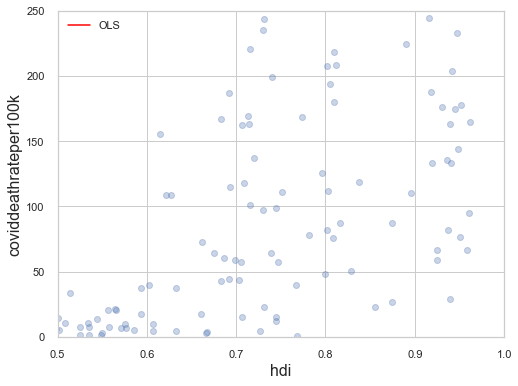

In [212]:
x = np.arange(covidvisual.hdi.min(), covidvisual.hdi.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(covidvisual.hdi, covidvisual.coviddeathrateper100k, alpha=.3)
ax.set_xlim((0.5, 1))
ax.set_ylim((0, 250))
legend = ax.legend()
ax.set_xlabel('hdi', fontsize=16)
ax.set_ylabel('coviddeathrateper100k', fontsize=16);

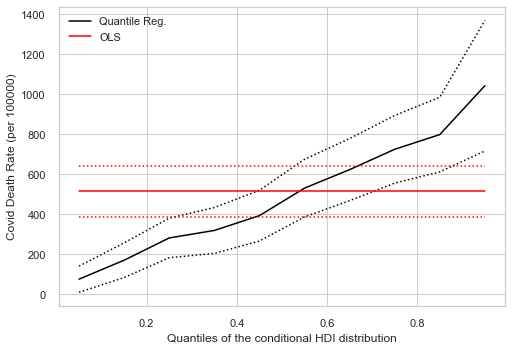

In [213]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'Covid Death Rate (per 100000)')
plt.xlabel('Quantiles of the conditional HDI distribution')
plt.legend()
plt.show()

The graph displays estimated coefficients as a function of quantile using a black line, with the OLS estimate of the coefficients shown by the horizontal line. For most of the estimated coefficients in the quantiles, the upper and lower bounds (at a 95% confidence interval) do not fall within the OLS estimate. 
This suggests a notable difference between the OLS estimates and the quantile regression estimates. As a result, it is logical to analyze the Covid death rate by quantiles of the conditional HDI distribution rather than just relying on a regular OLS estimate.